In [1]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle, islice
from sklearn.decomposition import PCA
from minisom import MiniSom
import seaborn as sns

from matplotlib.ticker import MaxNLocator

from multiprocessing import Pool

import hdbscan
import re
import os
import glob

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
def col_hist(df, c):
    plt.figure(figsize=[14,8])
    n, bins, patches = plt.hist(x=df, bins=75, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.60)
    plt.xlabel('Attribute Value',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Count',fontsize=12)
    plt.title(str(c) + ' Histogram',fontsize=15)
    f_name = str(c) +' _hist.png'
    plt.savefig(f_name)

In [3]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2')
final_df = pd.read_parquet('smallVol_df.parquet.gzip')

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1167513 entries, ('1000.0000000', '2450.0000000') to ('999.0000000', '7634.0000000')
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Disc        1167508 non-null  float64
 1   R3          1167508 non-null  float64
 2   QFact       1167508 non-null  float64
 3   CosPhs      1167508 non-null  float64
 4   RMSFreq     1167513 non-null  float64
 5   DiscDip     1167508 non-null  float64
 6   RespFreq    1167508 non-null  float64
 7   ThinBind    1167508 non-null  float64
 8   PhsResp     1167508 non-null  float64
 9   RelAmpChng  1167508 non-null  float64
 10  Azm         1167508 non-null  float64
 11  Dip         1167508 non-null  float64
 12  InsFreq     1167508 non-null  float64
 13  AvgFreq     1167508 non-null  float64
 14  RefStr      1167508 non-null  float64
 15  InsBand     1167508 non-null  float64
 16  AMP         1167508 non-null  float64
 17  AppPol    

In [5]:
final_df.columns

Index(['Disc', 'R3', 'QFact', 'CosPhs', 'RMSFreq', 'DiscDip', 'RespFreq',
       'ThinBind', 'PhsResp', 'RelAmpChng', 'Azm', 'Dip', 'InsFreq', 'AvgFreq',
       'RefStr', 'InsBand', 'AMP', 'AppPol', 'InsPhs'],
      dtype='object')

In [6]:
outlier_ranges = pd.read_csv('outlierRanges.csv')

In [7]:
temp_dict = {}
for n in outlier_ranges.columns:
    final_df[n] = final_df[n].apply(lambda x: x if (x >= outlier_ranges[n][0] and x <= outlier_ranges[n][1])  else np.nan)
    print(n)

Disc
R3
CosPhs
RMSFreq
DiscDip
RespFreq
ThinBind
PhsResp
RelAmpChng
Azm
InsFreq
RefStr
InsBand
AMP
AppPol


In [8]:
final_df.isnull().sum(axis = 0)/final_df.shape[0]

Disc          0.050656
R3            0.000102
QFact         0.000004
CosPhs        0.016611
RMSFreq       0.027446
DiscDip       0.055341
RespFreq      0.000111
ThinBind      0.047028
PhsResp       0.000208
RelAmpChng    0.028937
Azm           0.000224
Dip           0.000004
InsFreq       0.094043
AvgFreq       0.000004
RefStr        0.087382
InsBand       0.024327
AMP           0.096345
AppPol        0.004468
InsPhs        0.000004
dtype: float64

/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


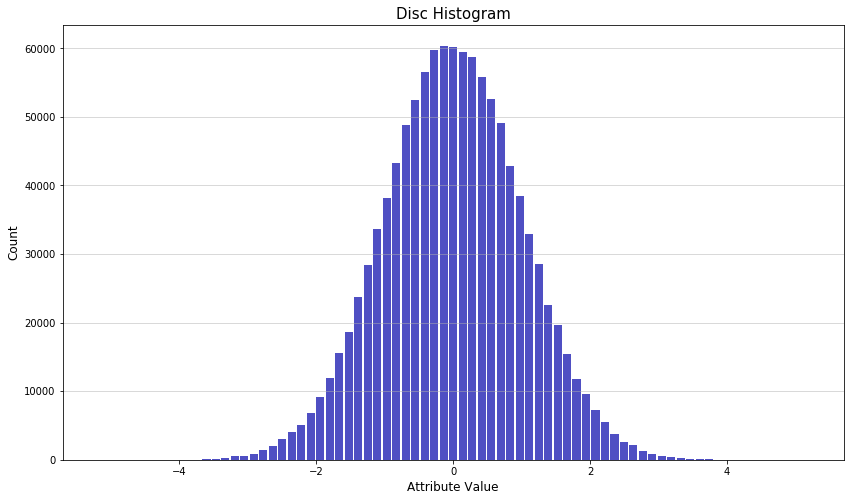

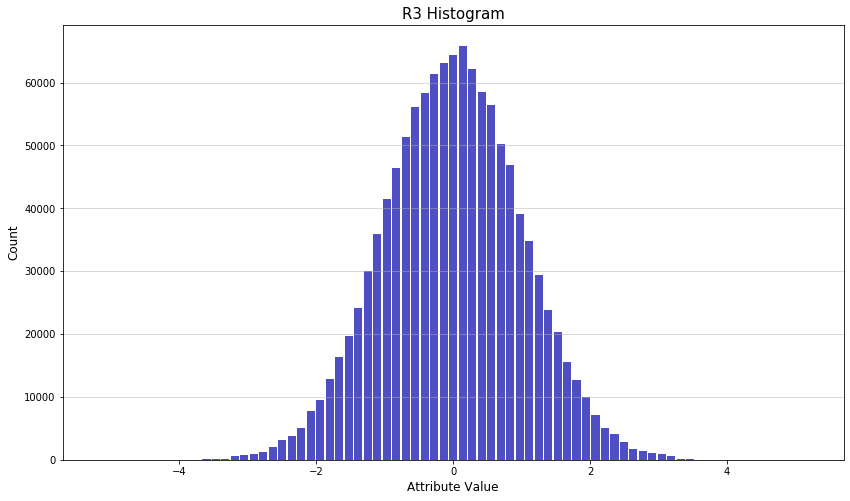

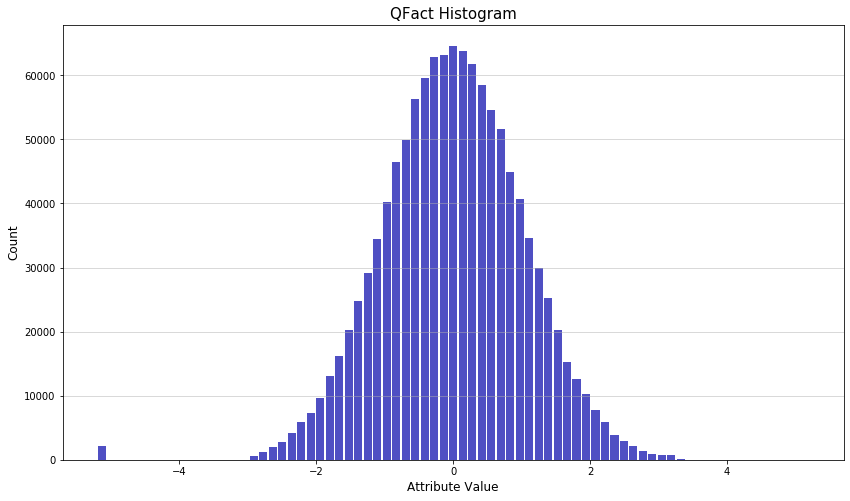

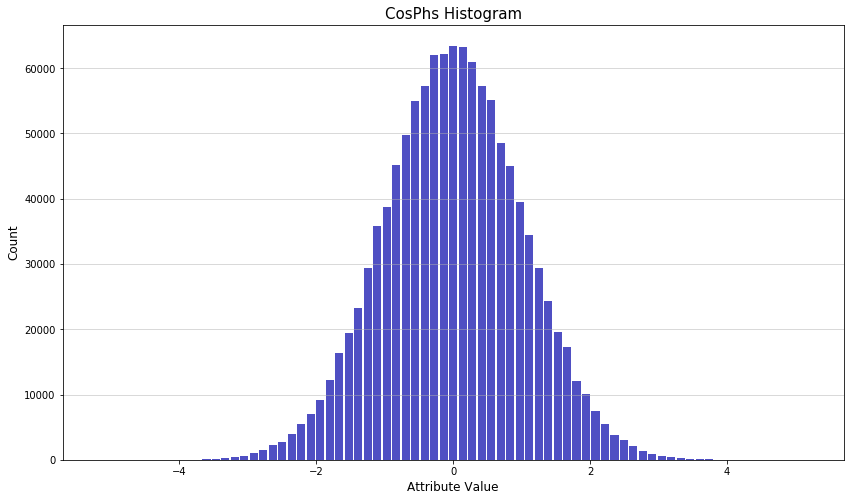

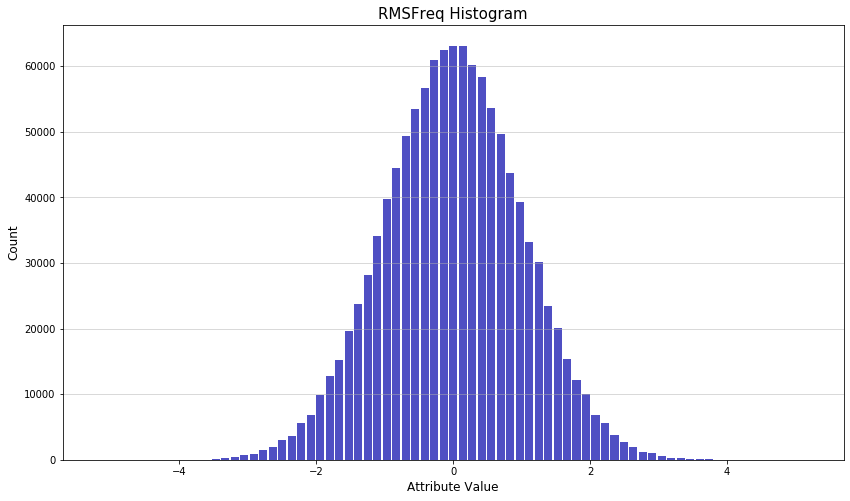

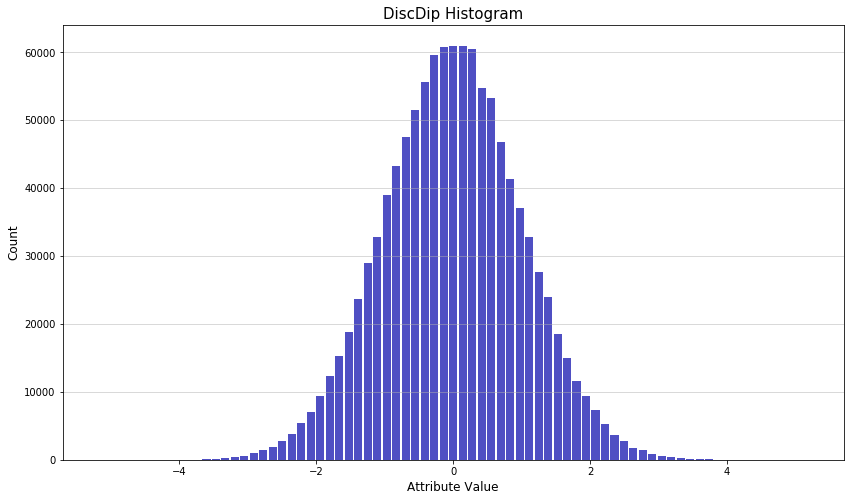

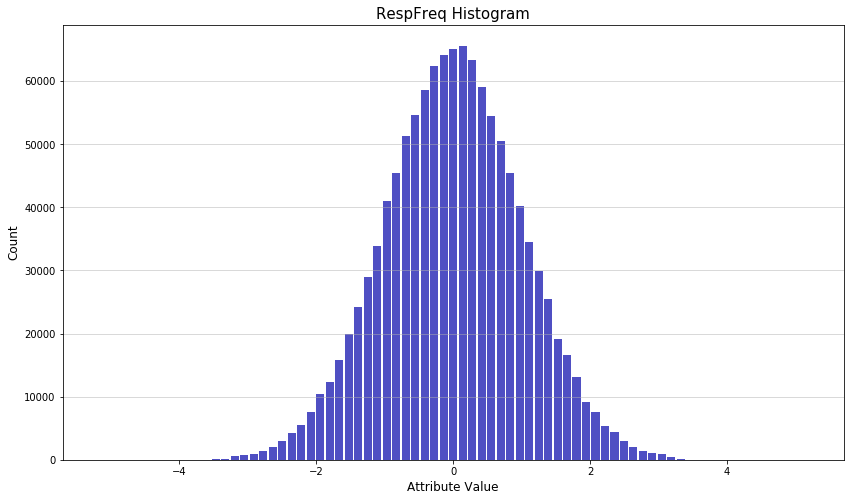

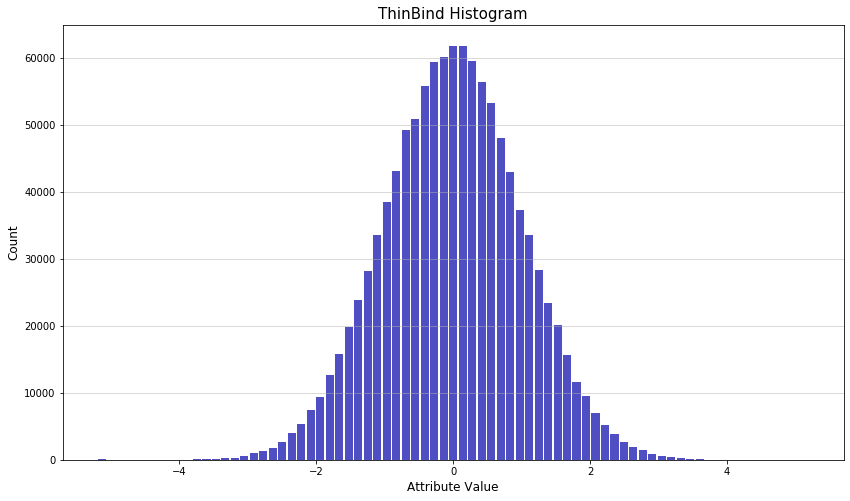

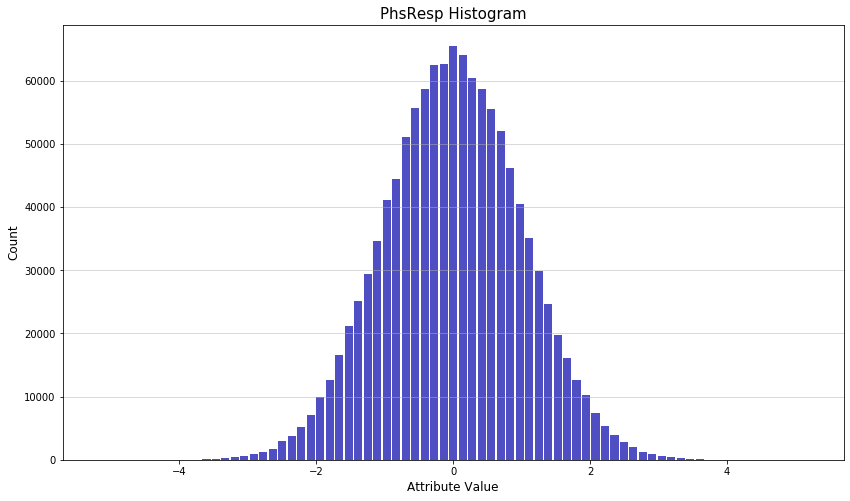

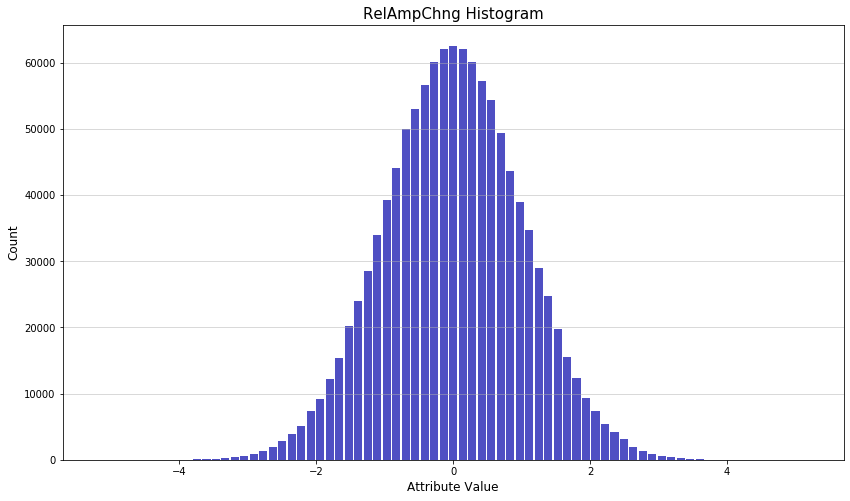

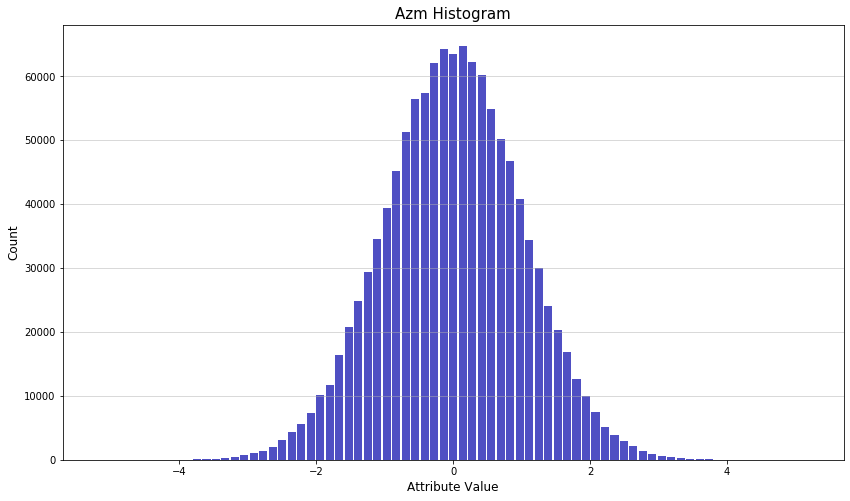

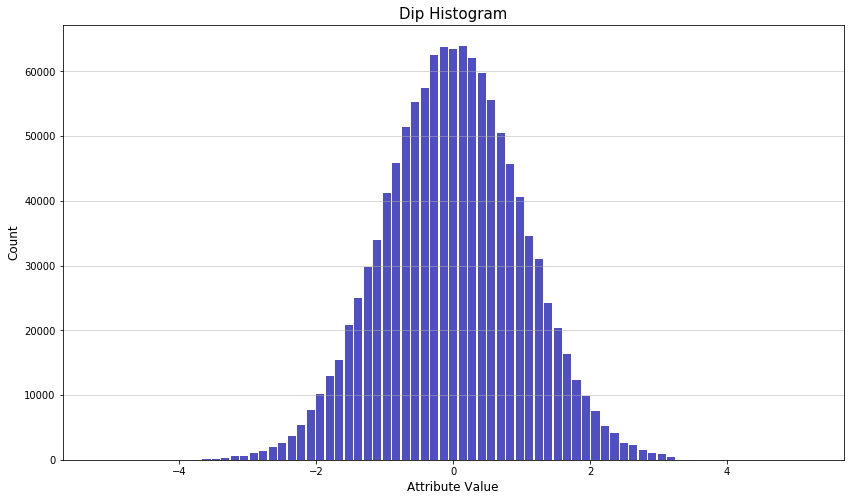

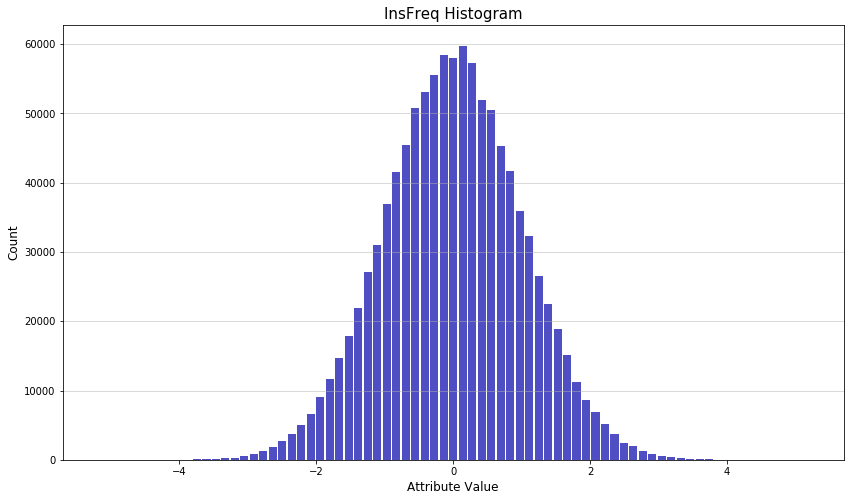

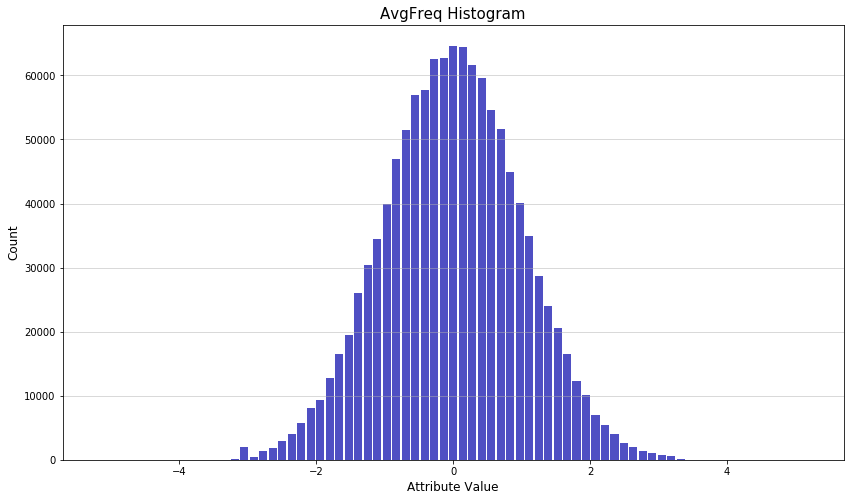

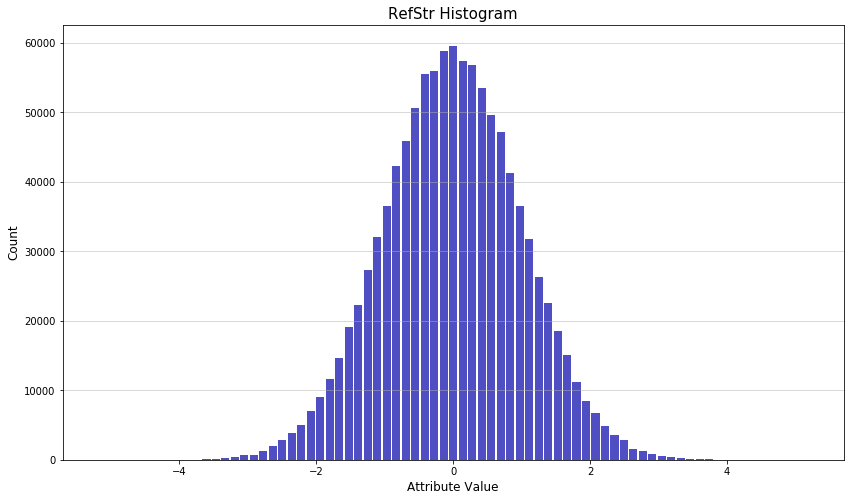

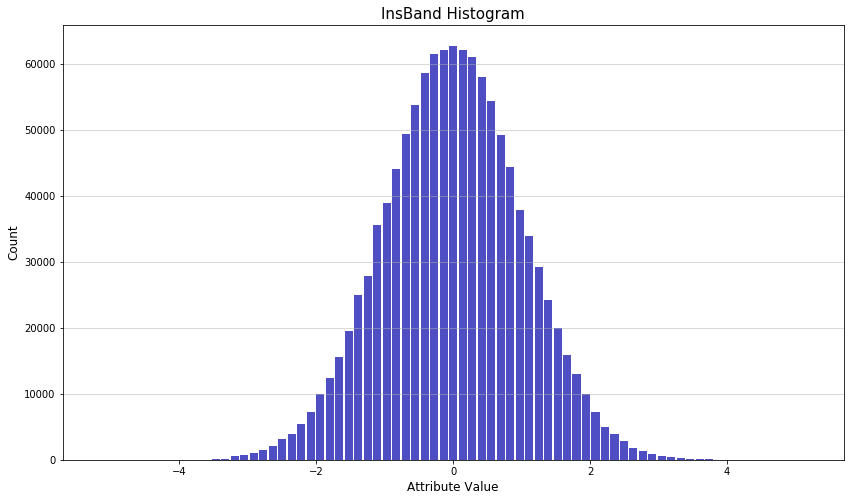

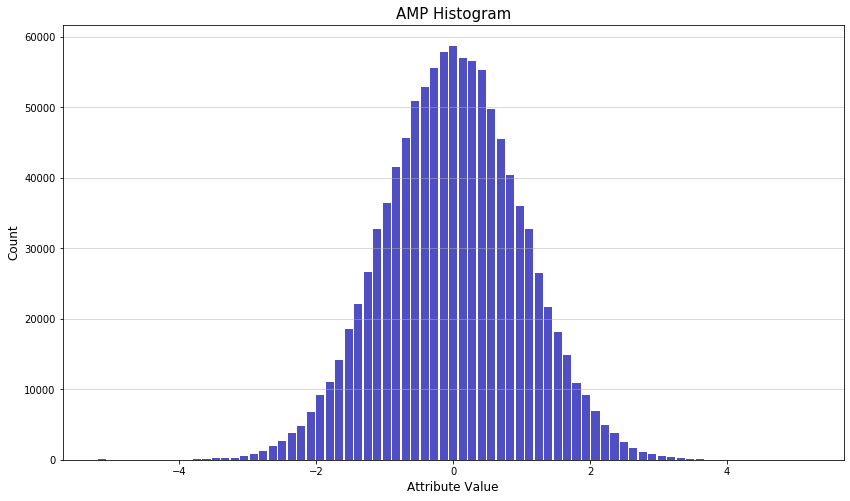

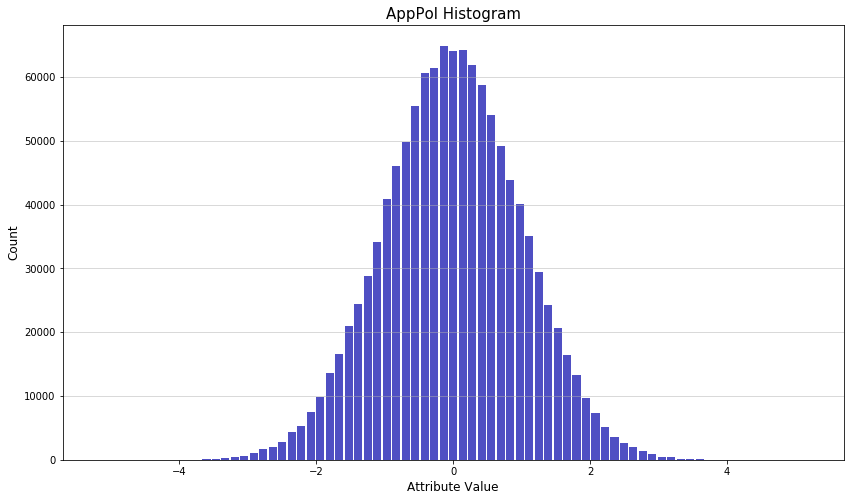

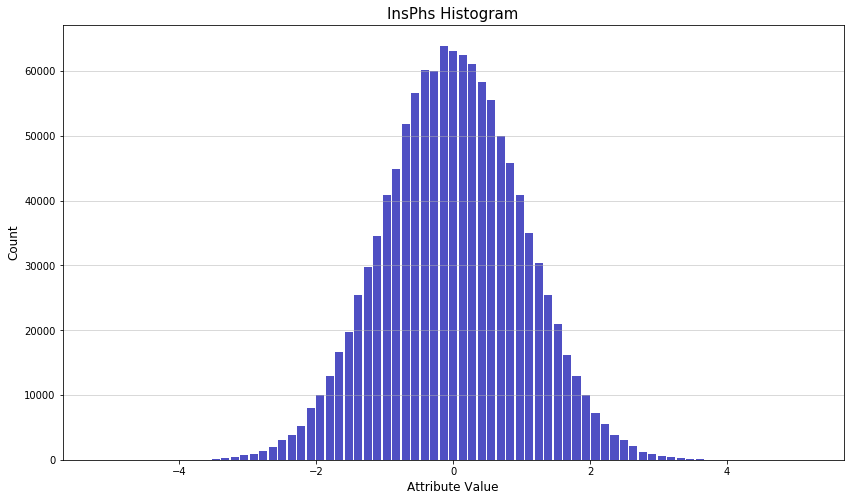

In [9]:
qt = QuantileTransformer(output_distribution='normal')
final_q = qt.fit_transform(final_df)
final_df_q = pd.DataFrame(final_q, columns = final_df.columns)
final_df_q.index = final_df.index

os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist_q')

for col in final_df_q.columns:
    col_hist(final_df_q[col], col)

/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


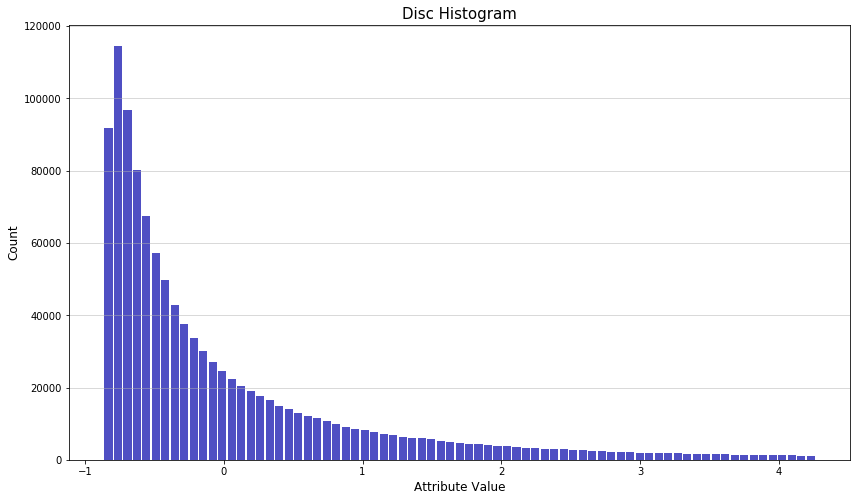

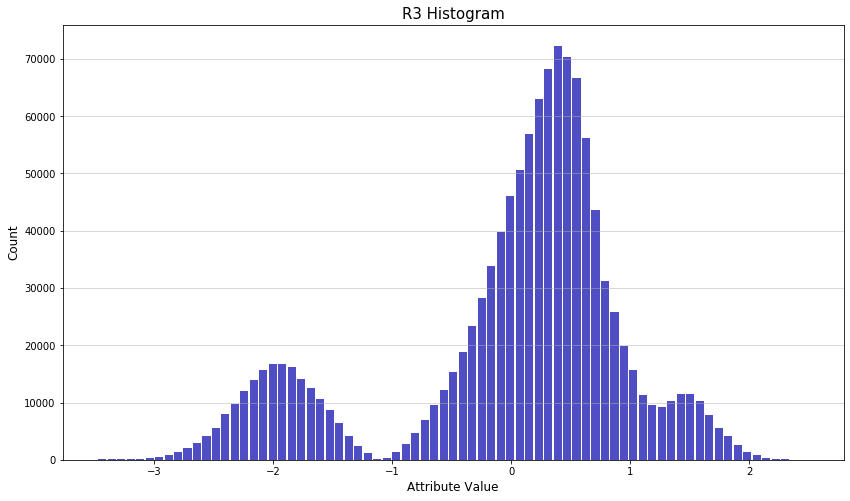

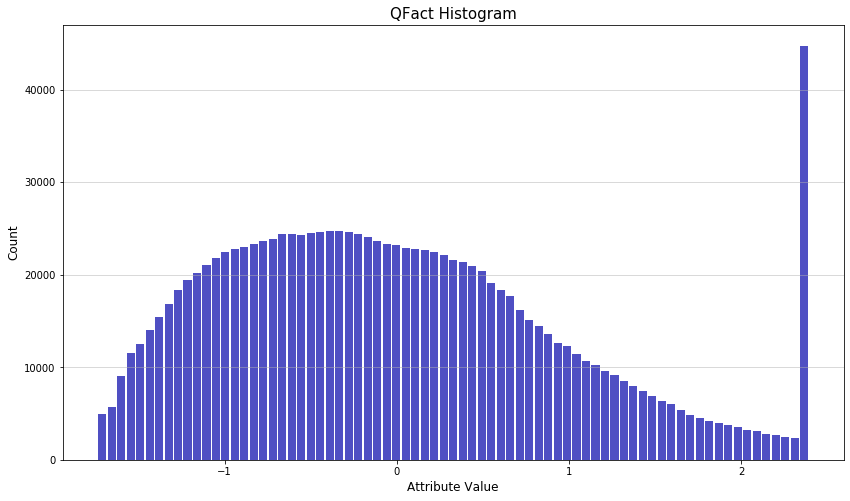

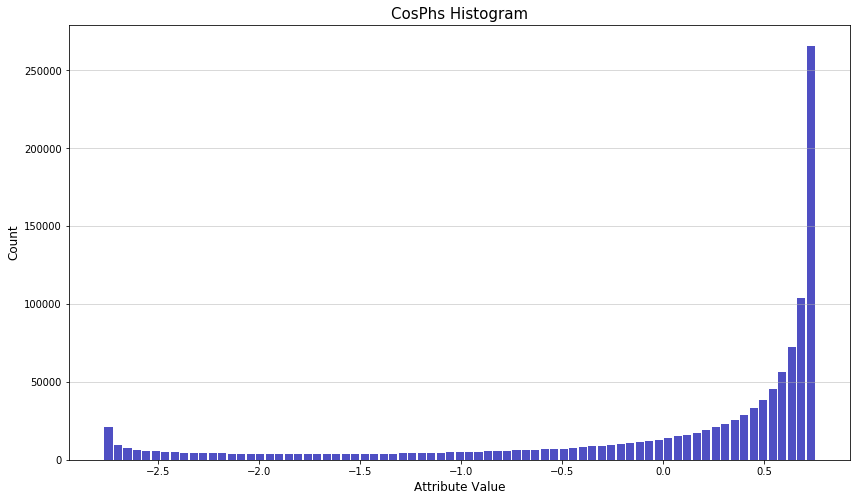

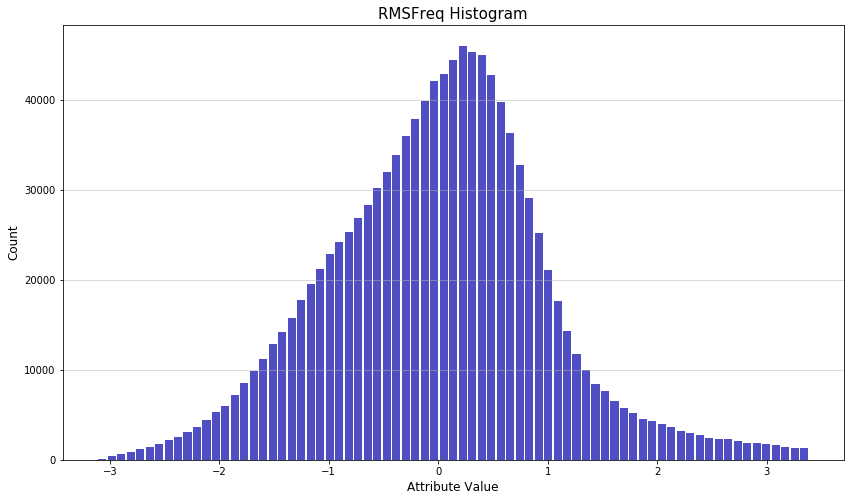

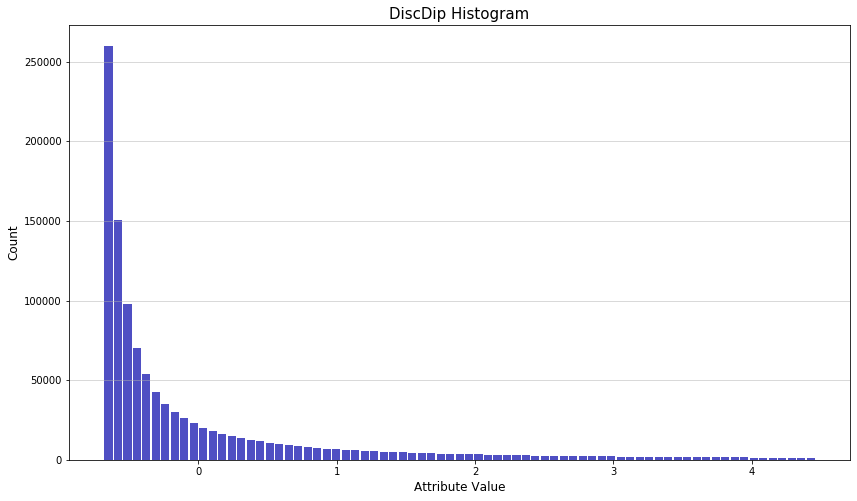

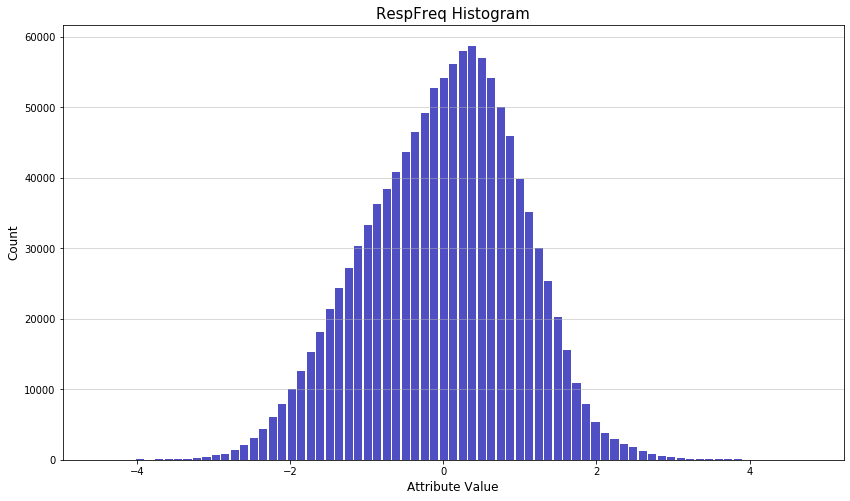

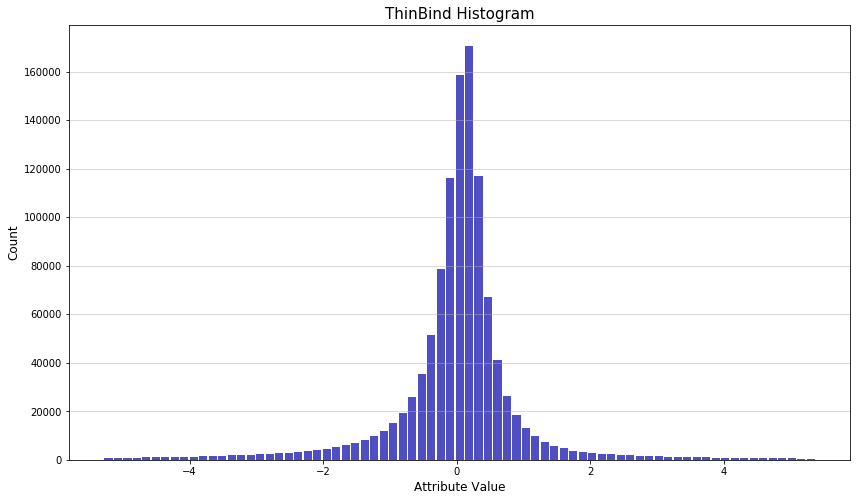

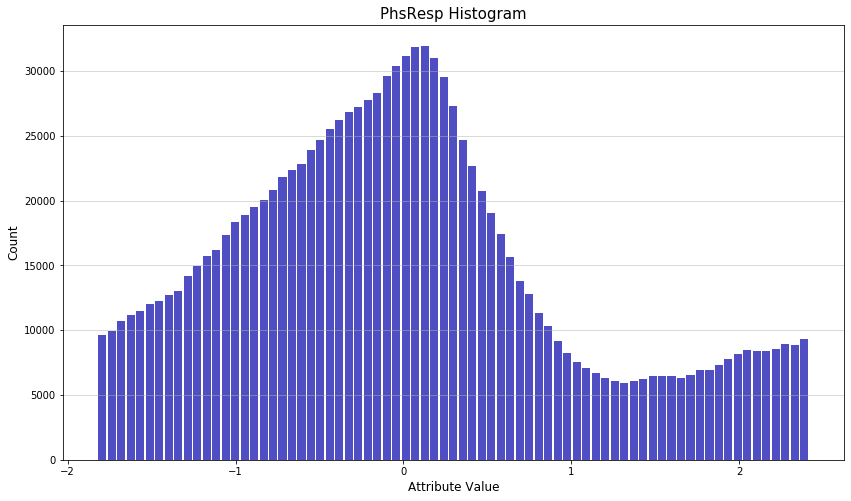

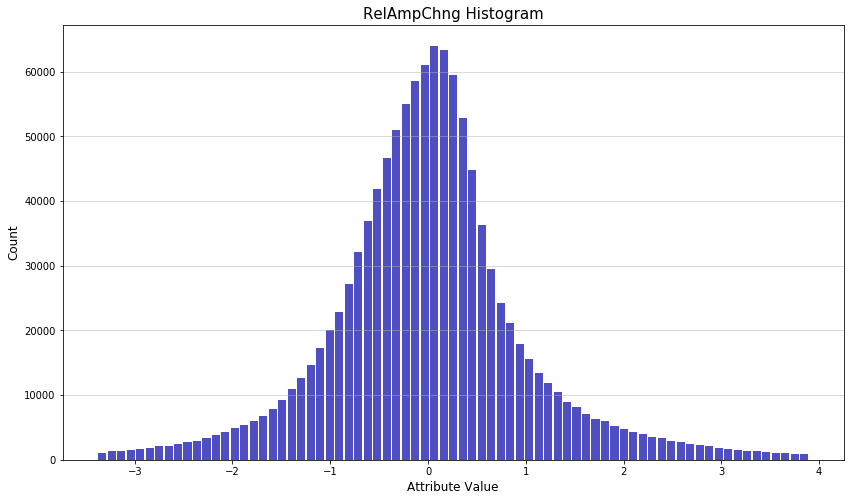

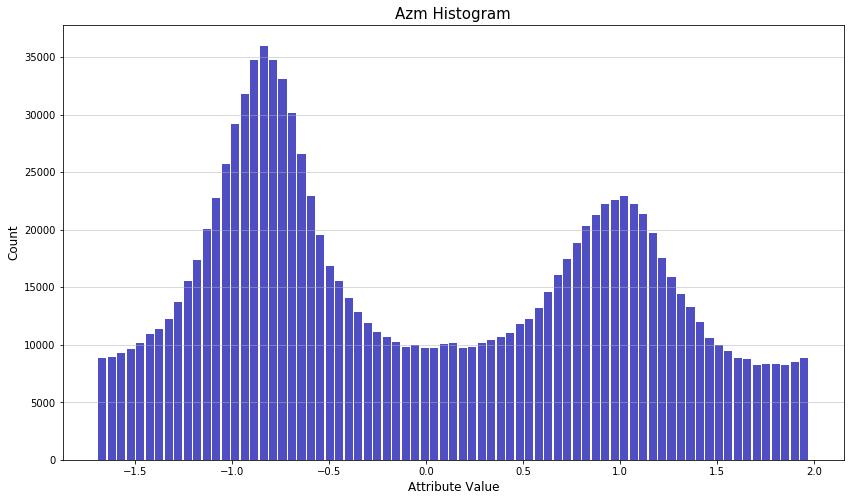

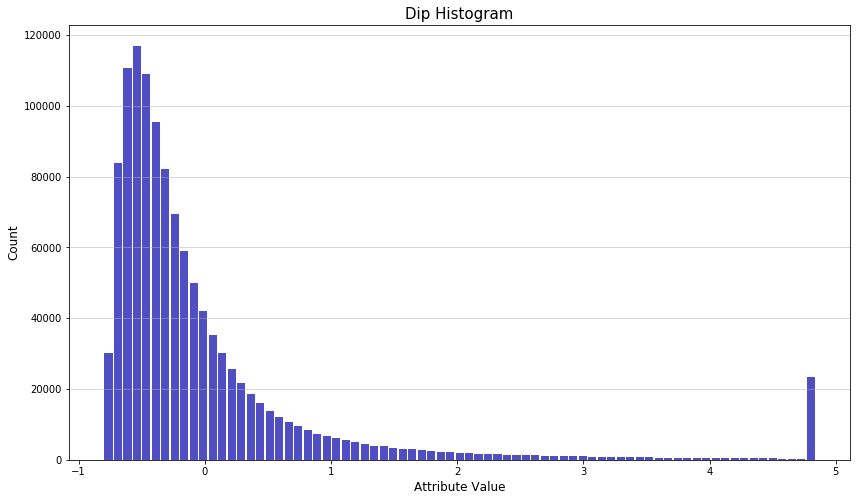

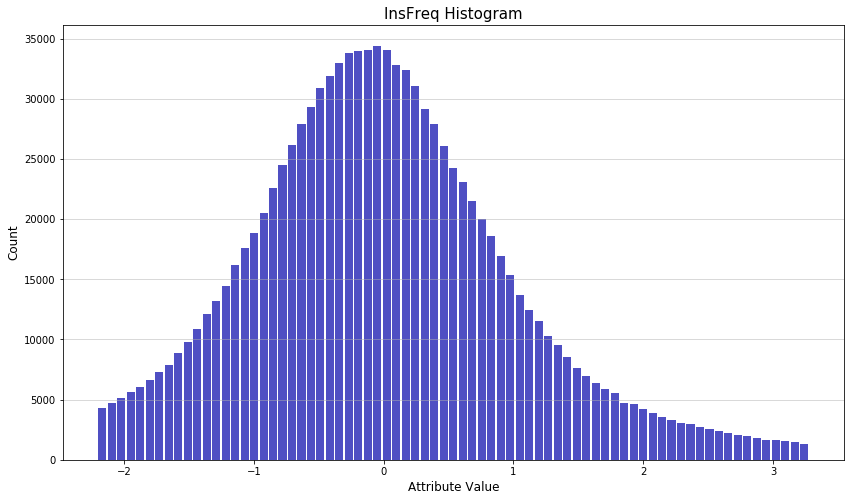

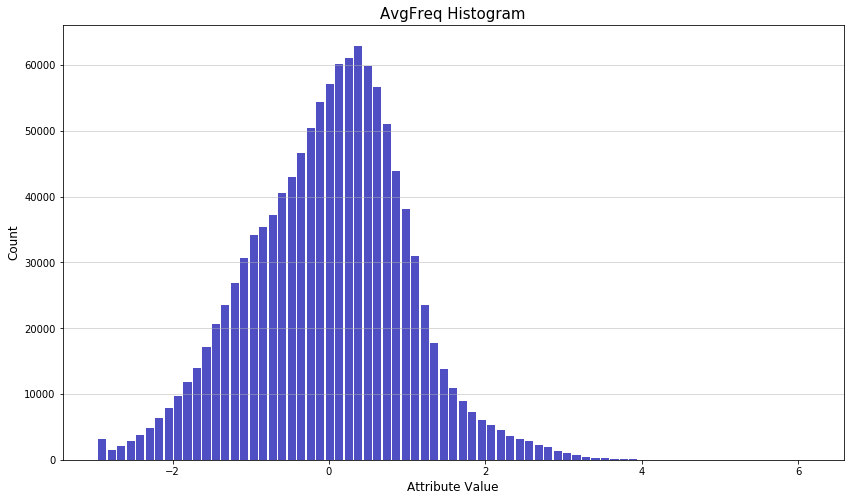

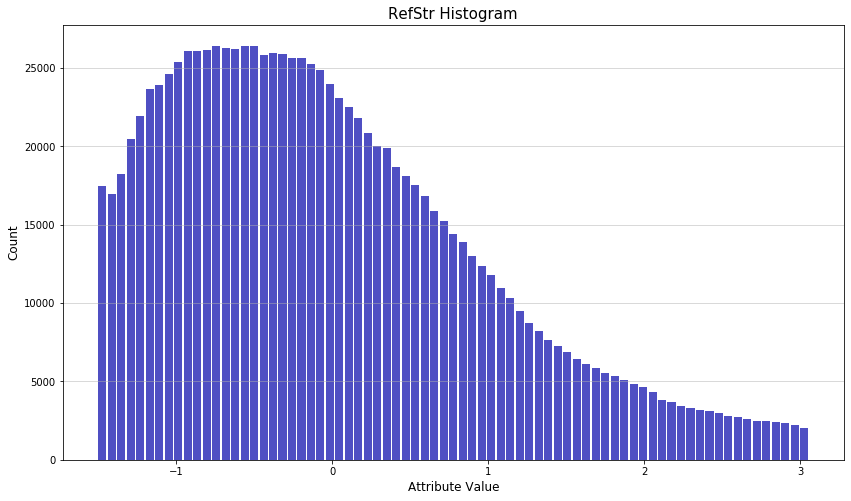

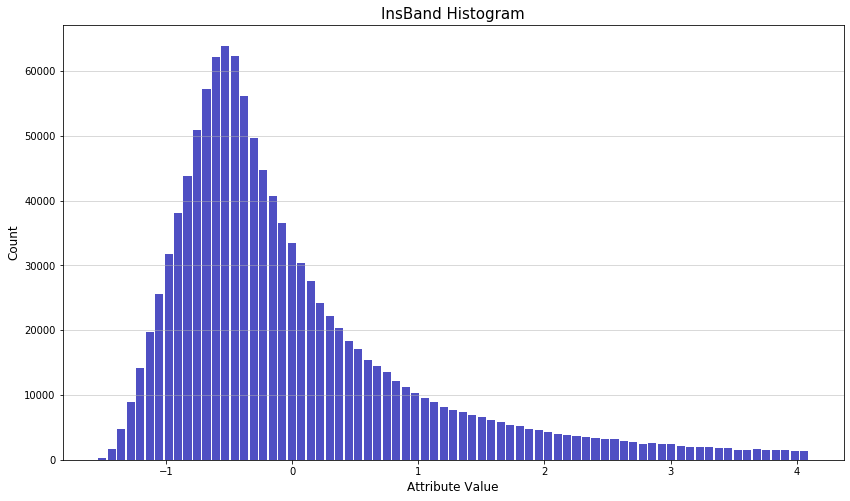

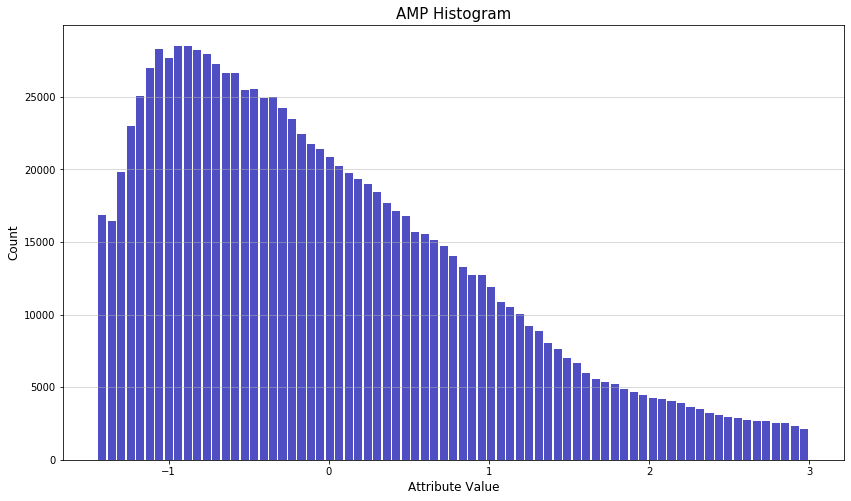

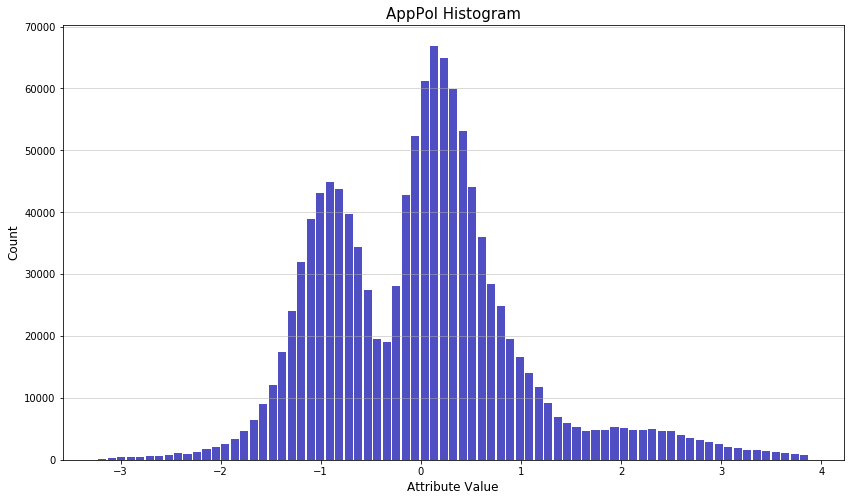

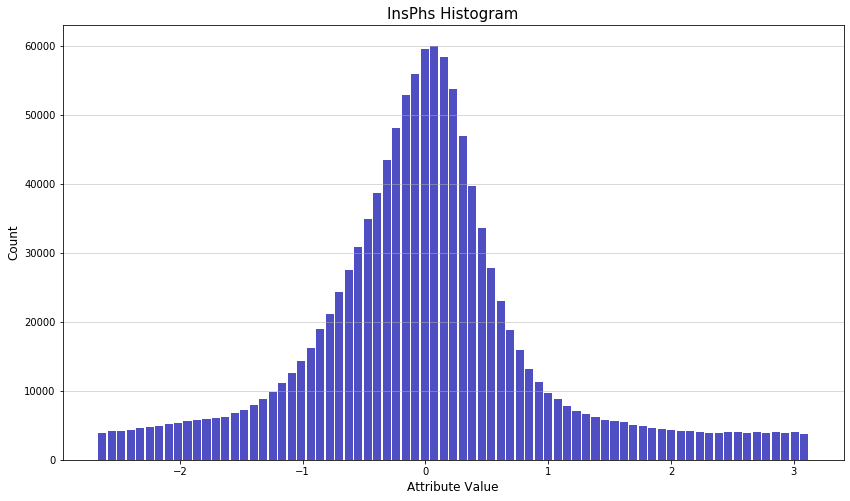

In [10]:
final_df_std = StandardScaler().fit_transform(final_df)
final_df_std = pd.DataFrame(final_df_std, columns = final_df.columns)
final_df_std.index = final_df.index

os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist_std')

for col in final_df_std.columns:
    col_hist(final_df_std[col], col)

/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/data_science/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


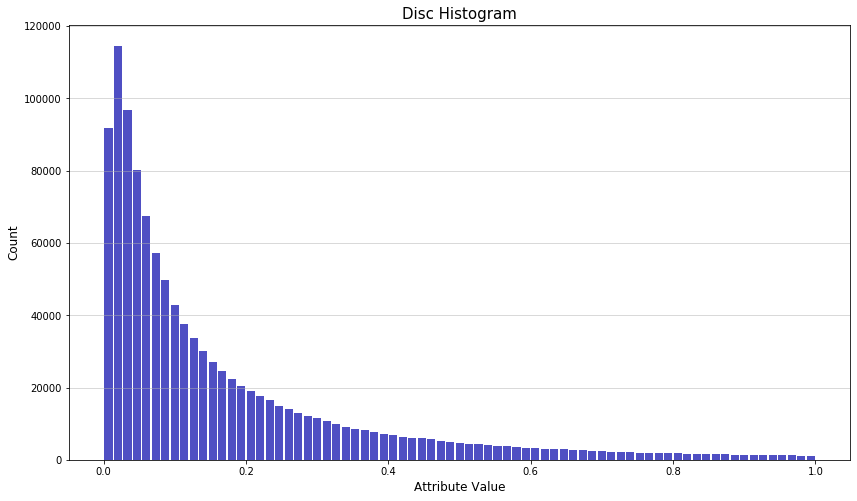

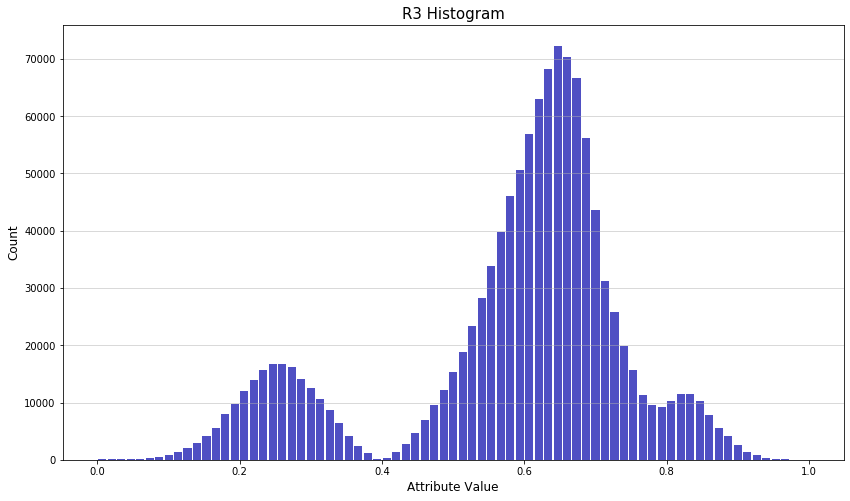

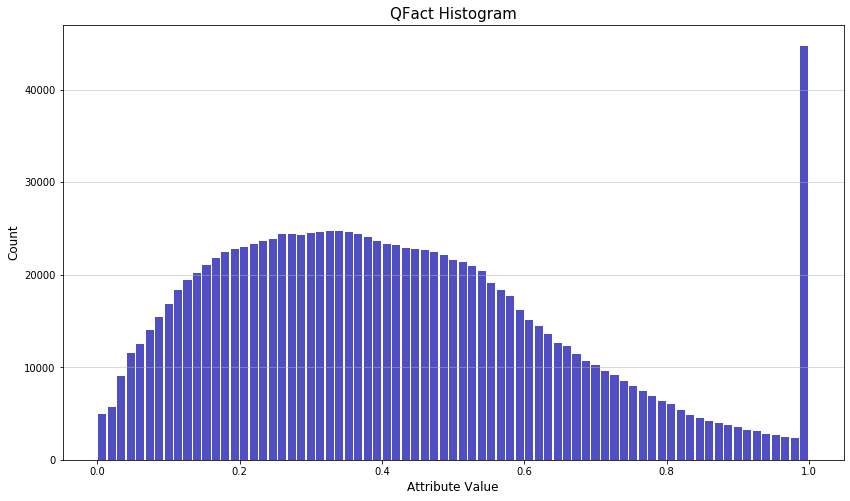

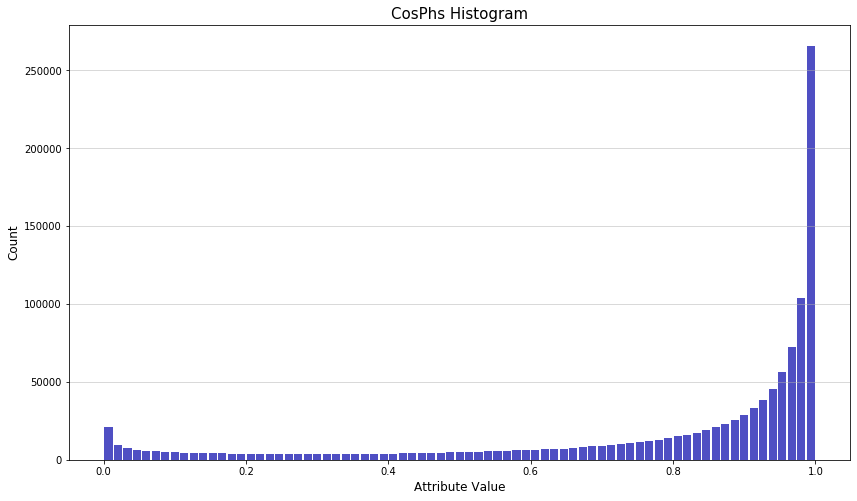

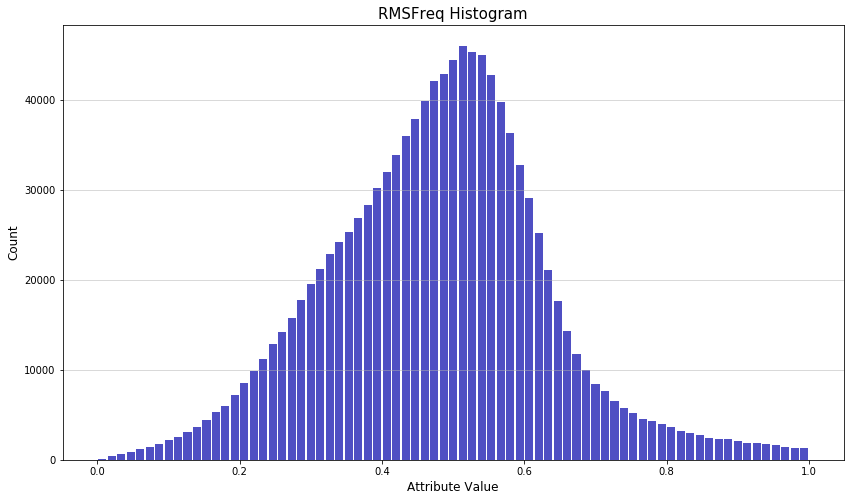

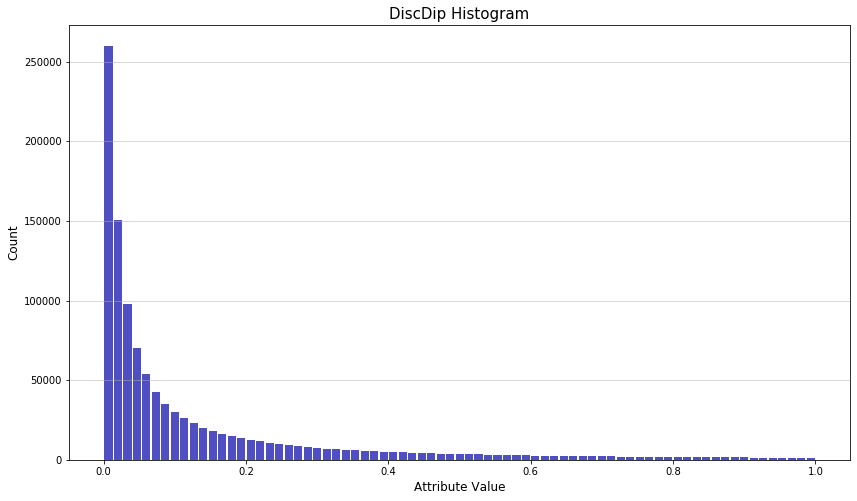

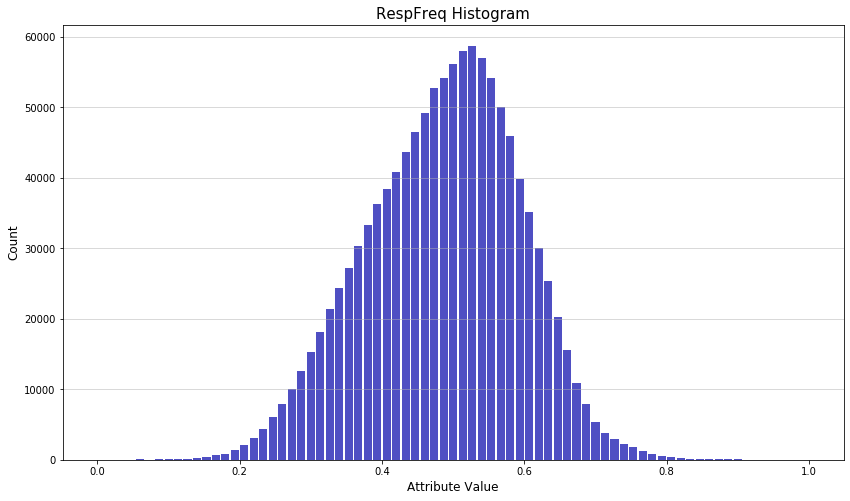

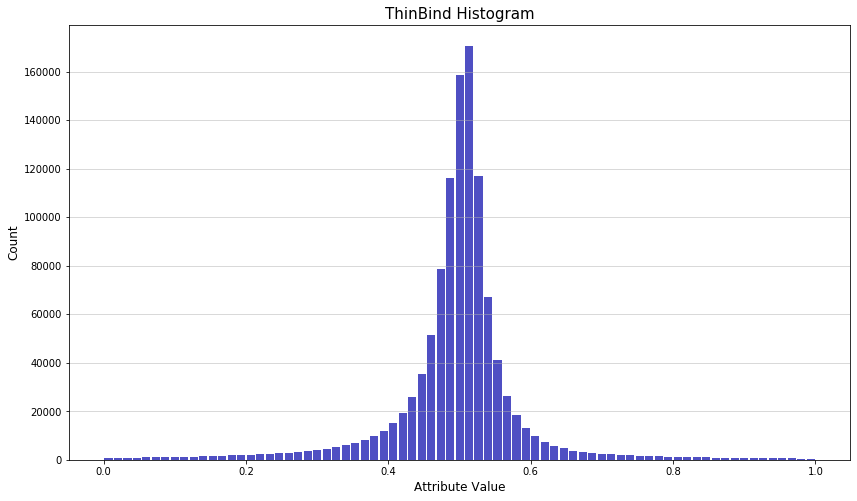

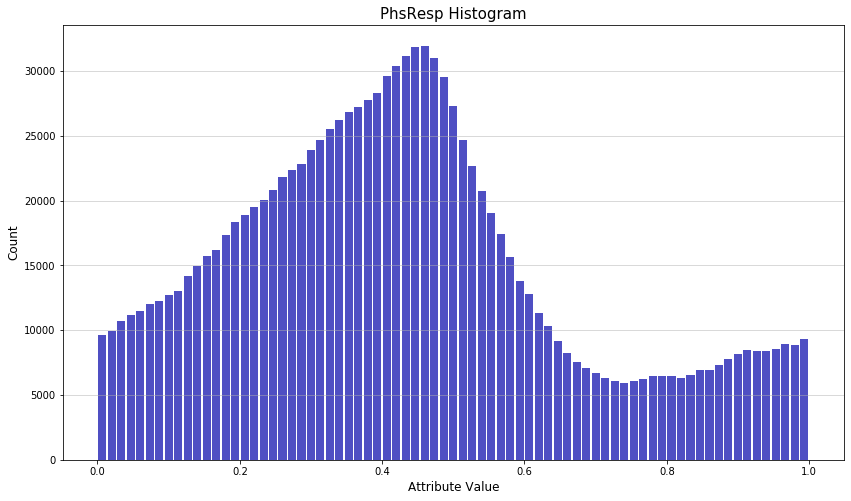

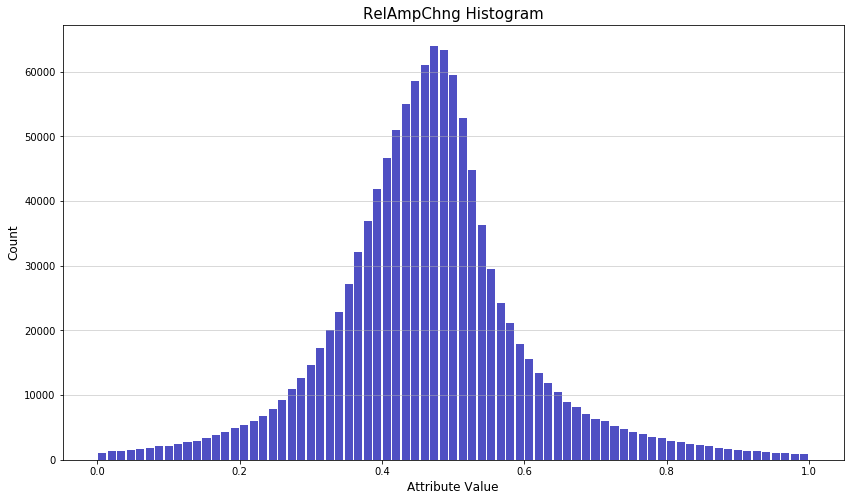

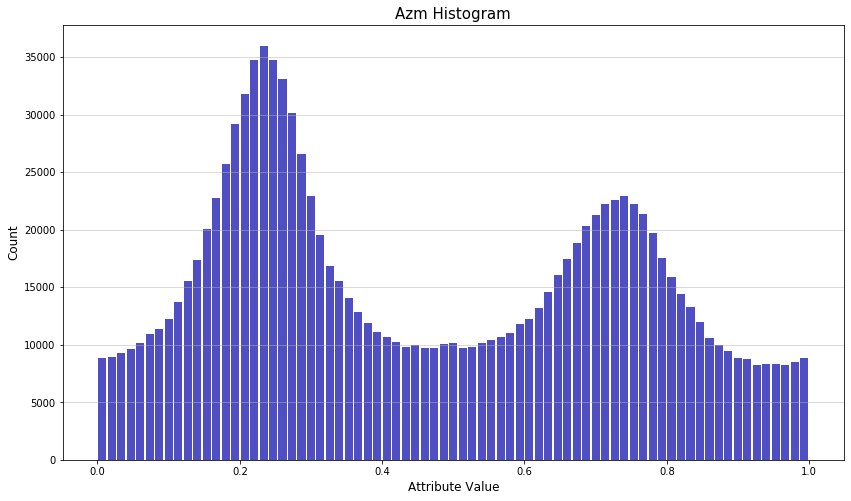

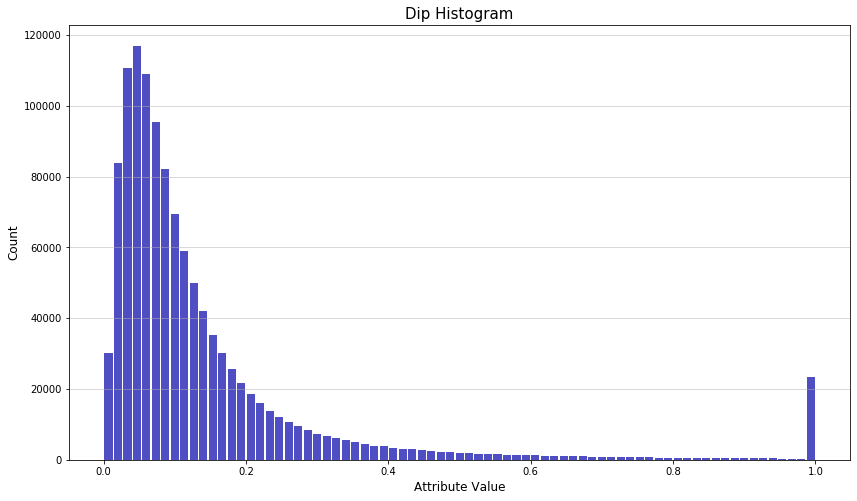

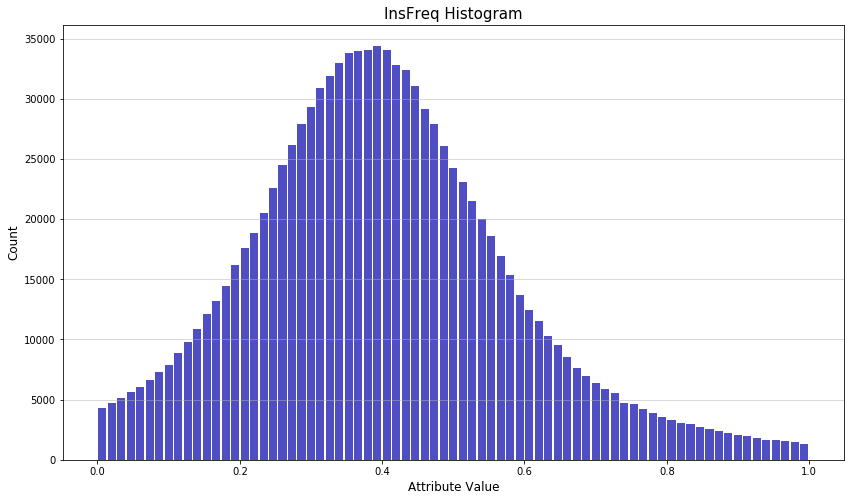

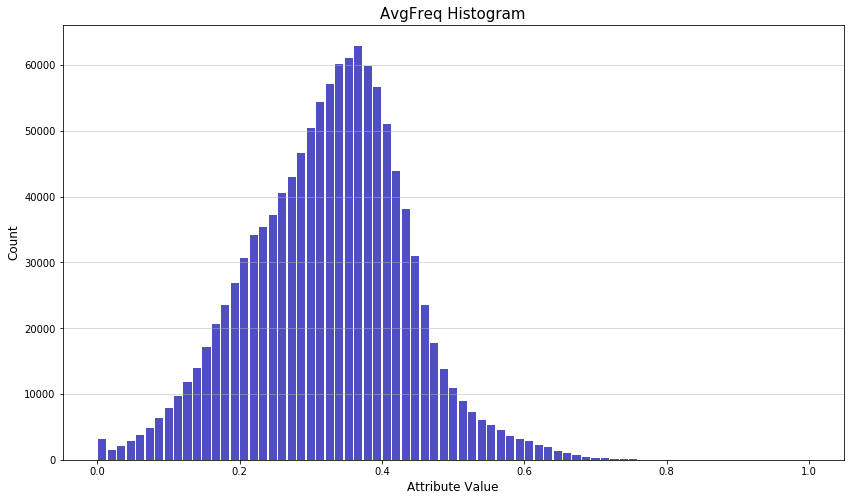

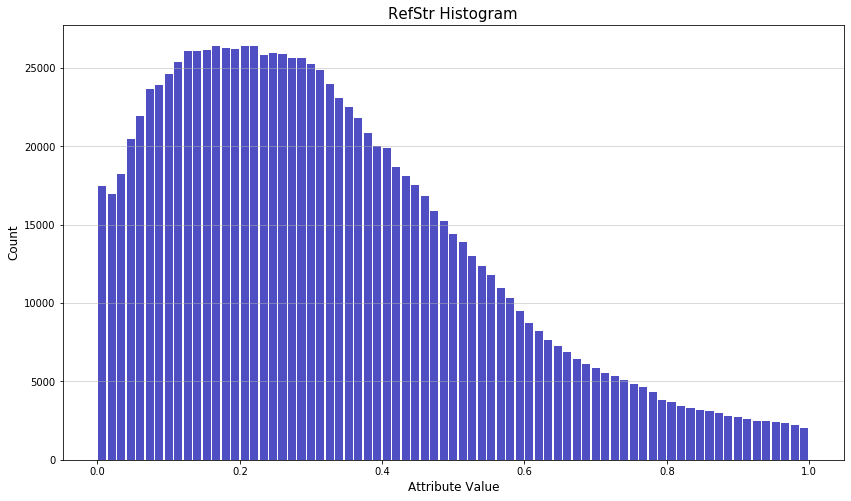

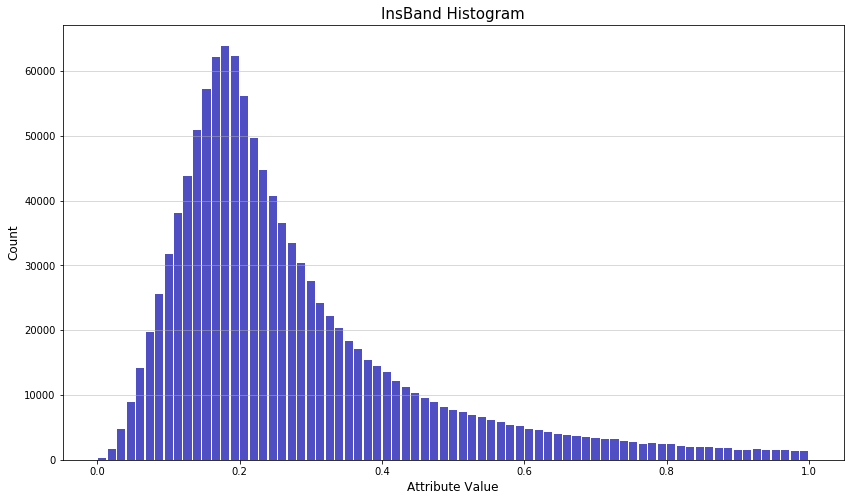

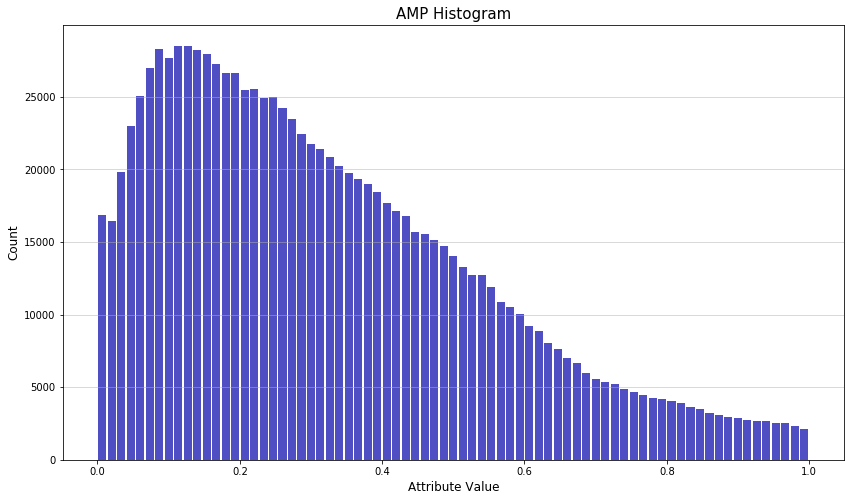

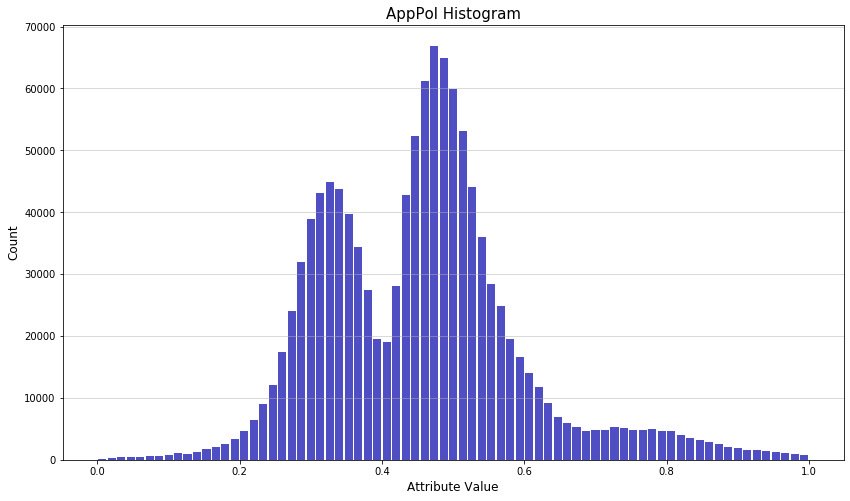

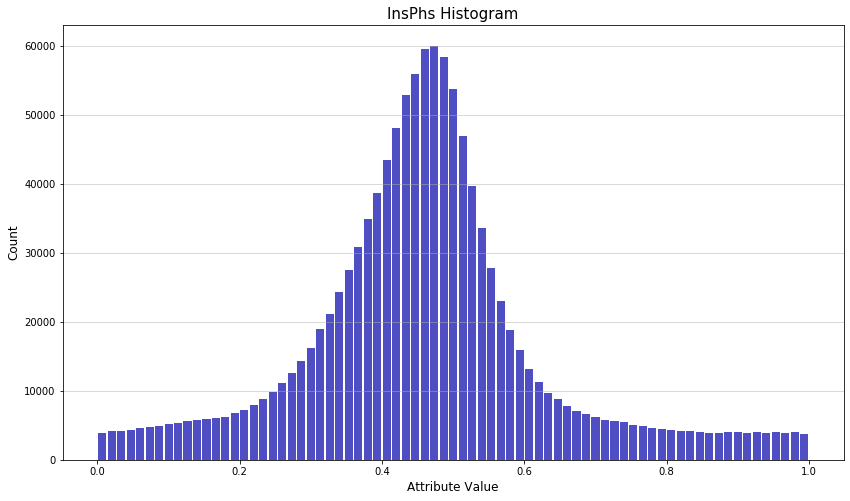

In [11]:
scaler = MinMaxScaler()

final_df_minmax = scaler.fit_transform(final_df)
final_df_minmax = pd.DataFrame(final_df_minmax, columns = final_df.columns)
final_df_minmax.index = final_df.index

os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist_minmax')

for col in final_df_minmax.columns:
    col_hist(final_df_minmax[col], col)

In [12]:
a = {}
a['quantile_scaler'] = final_df_q
a['std_scaler'] = final_df_std
a['minmax_scaler'] = final_df_minmax

os.chdir('/Landmark1/phase2_storage_sfml/')

with open('normalizedDict.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
from sklearn.ensemble import IsolationForest
import numpy as np

final_df = final_df.dropna()
clf = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
final_df['outlierDetector'] = clf.fit_predict(final_df)

In [50]:
final_df['outlierDetector'] = final_df['outlierDetector'].replace(-1, np.nan)
final_df = final_df.dropna()
final_df = final_df.drop(['outlierDetector'], axis=1)

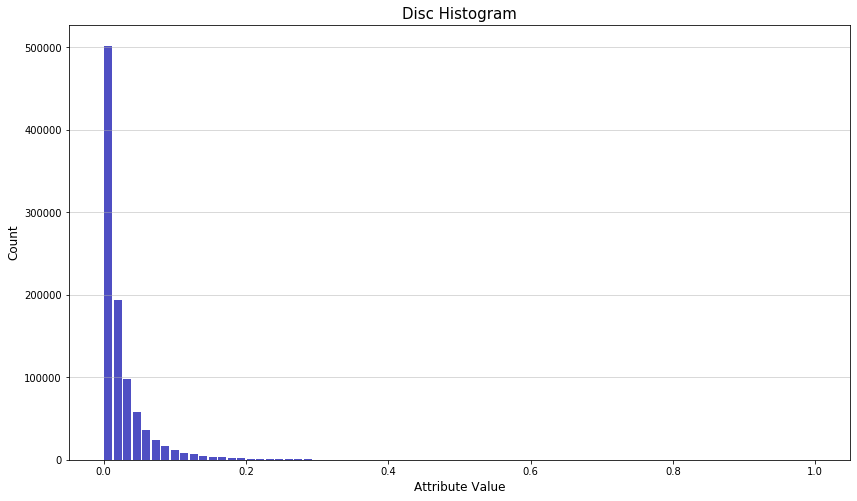

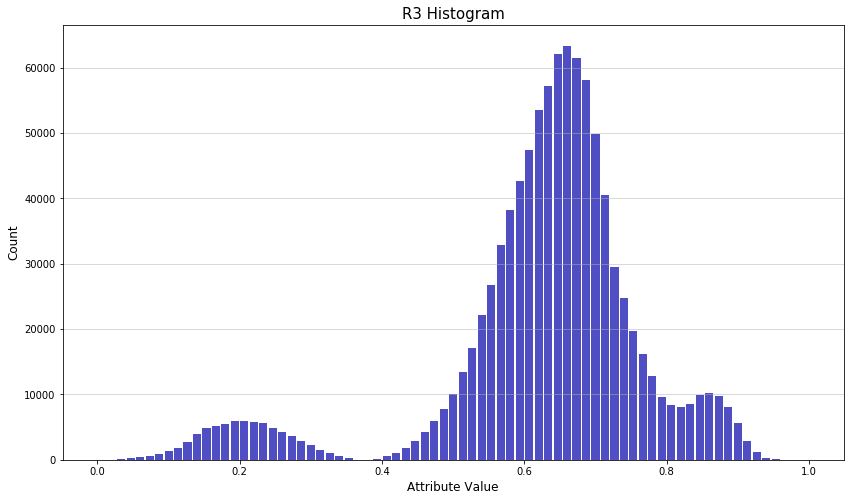

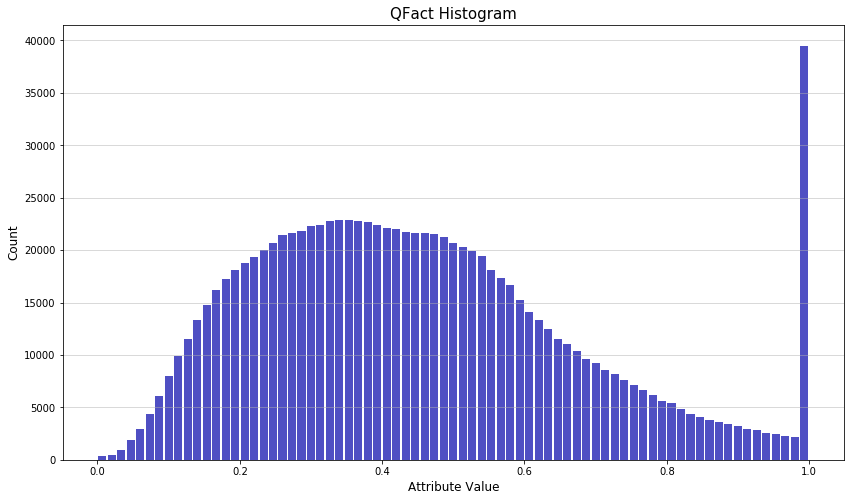

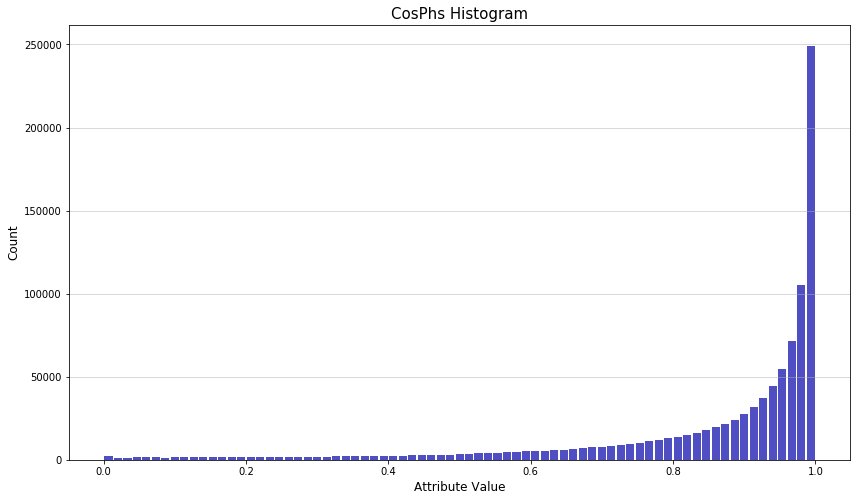

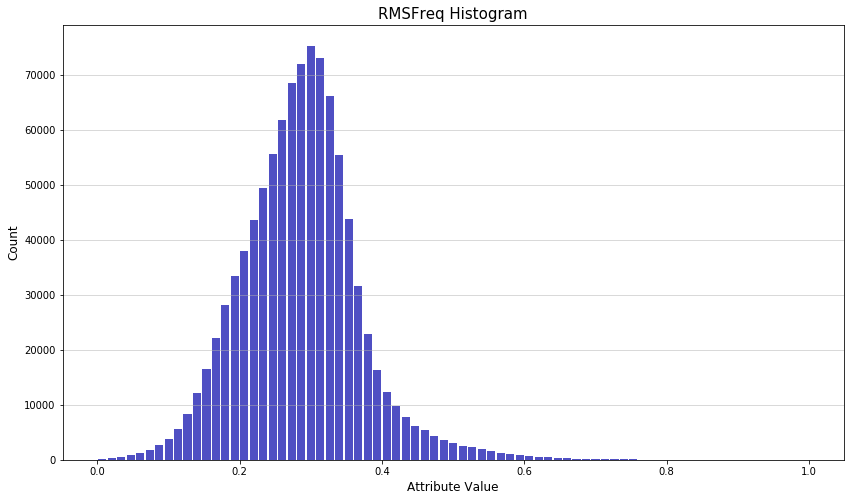

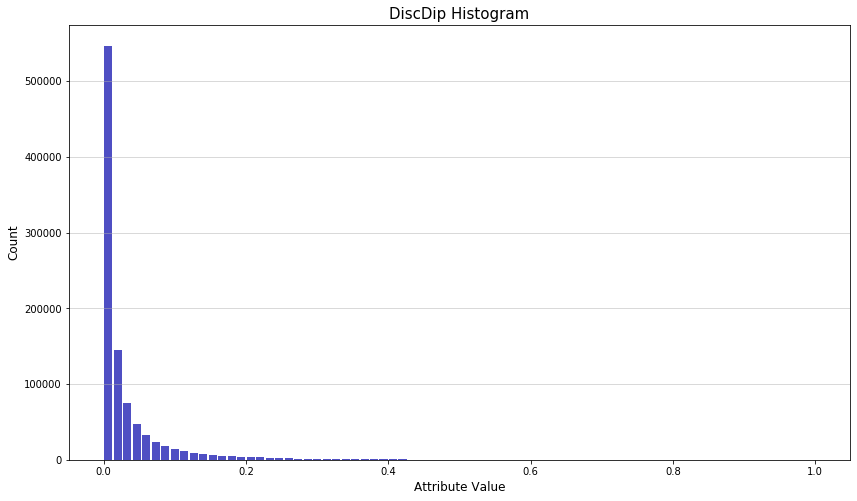

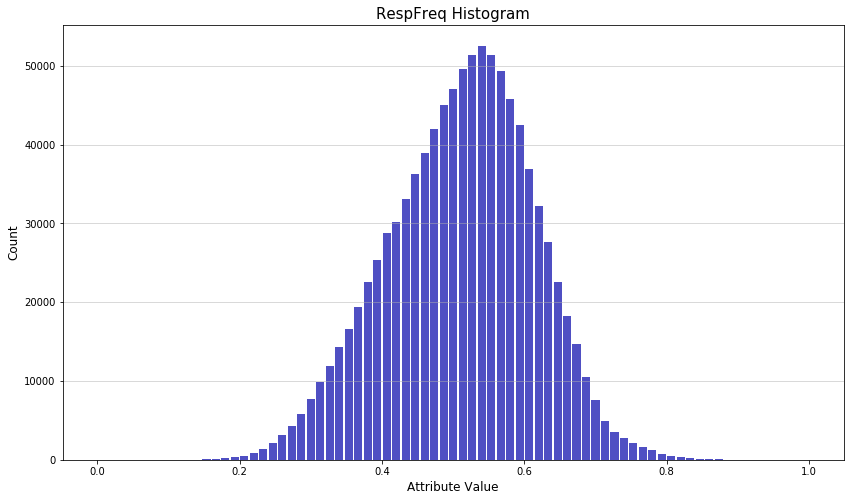

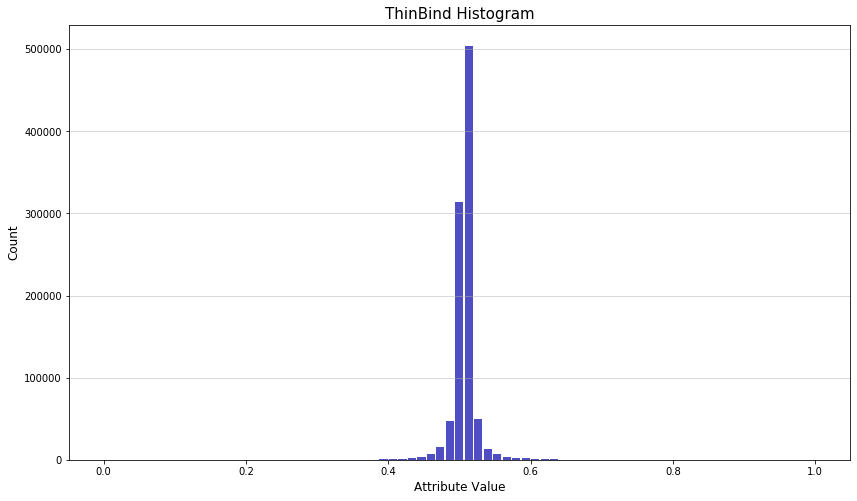

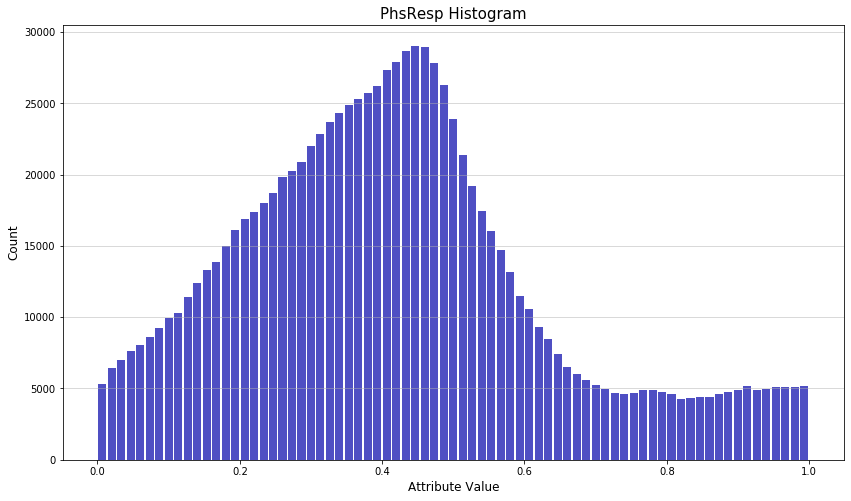

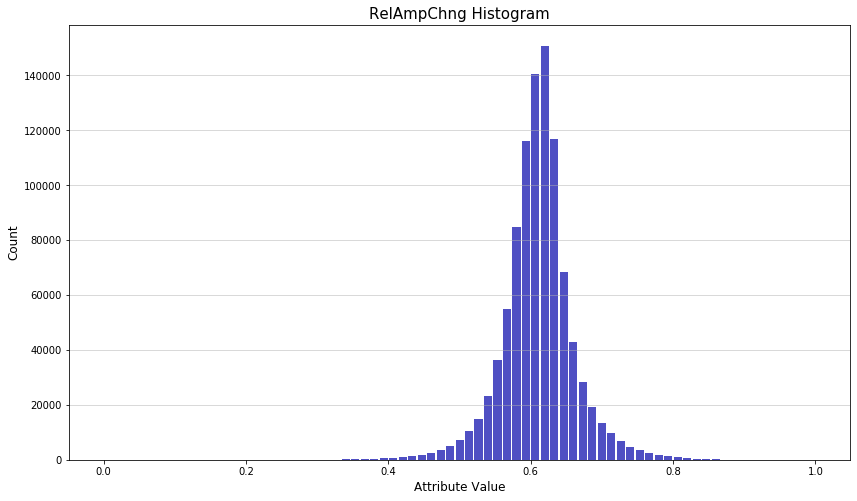

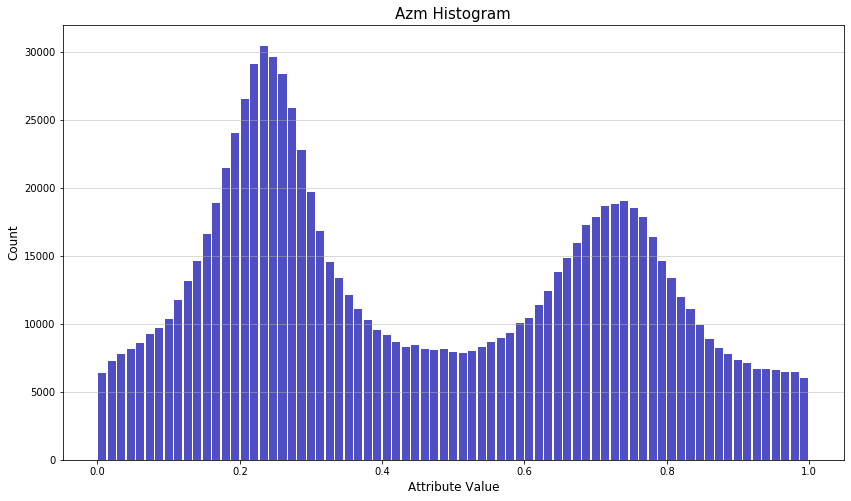

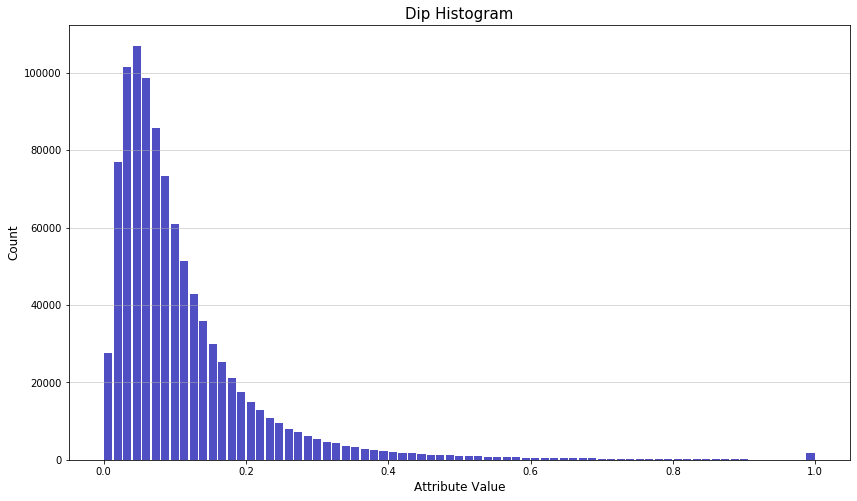

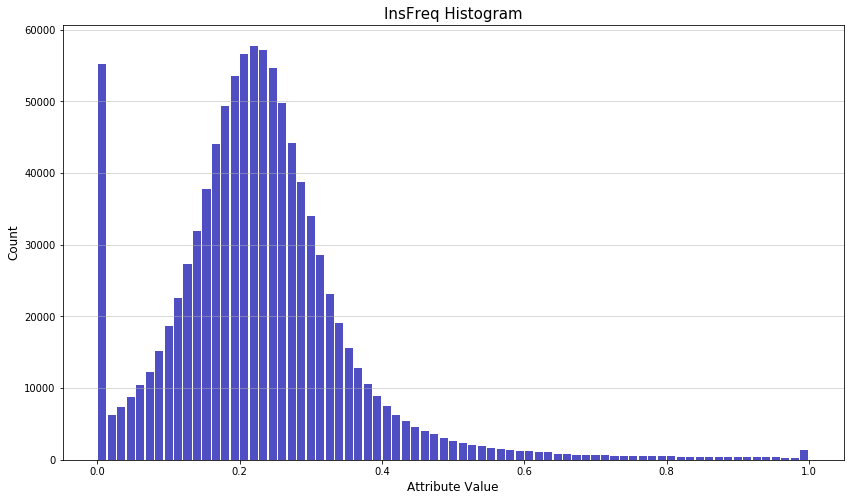

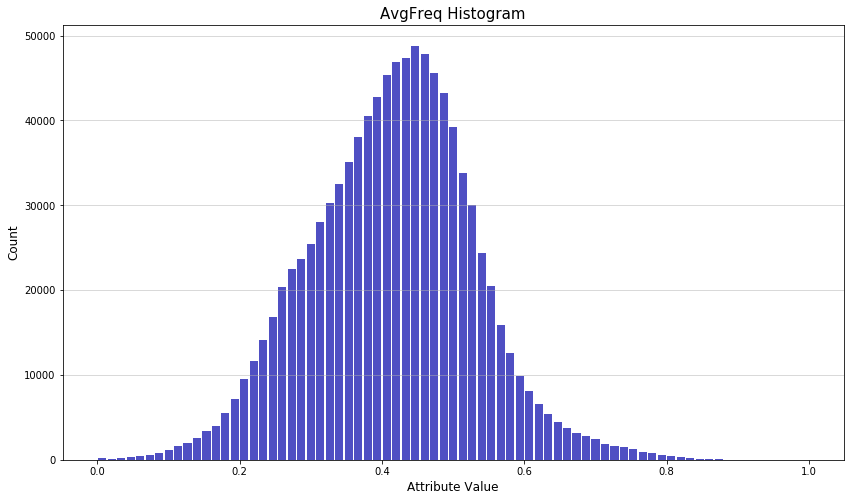

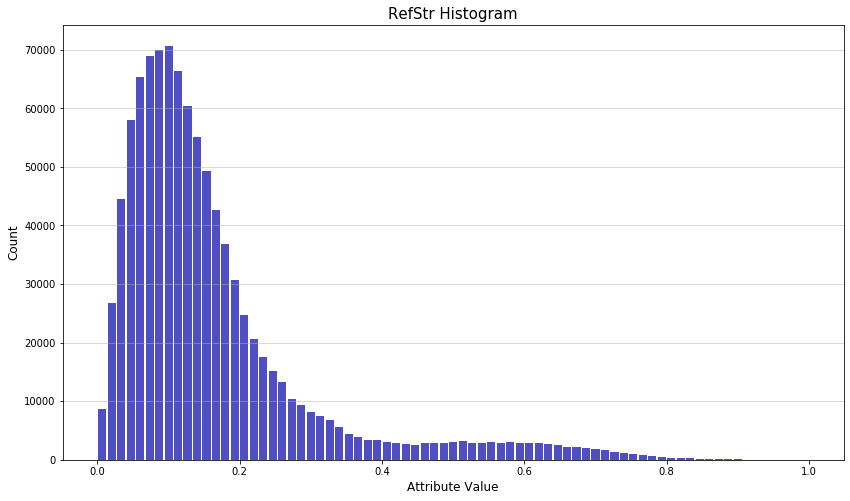

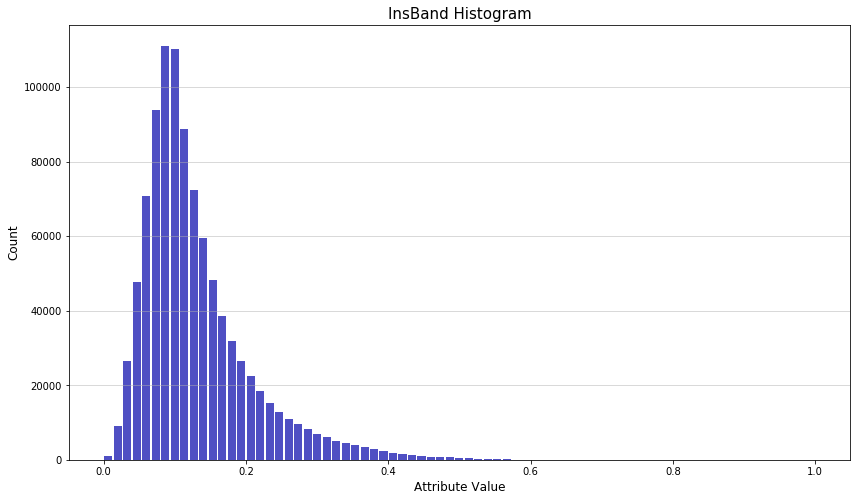

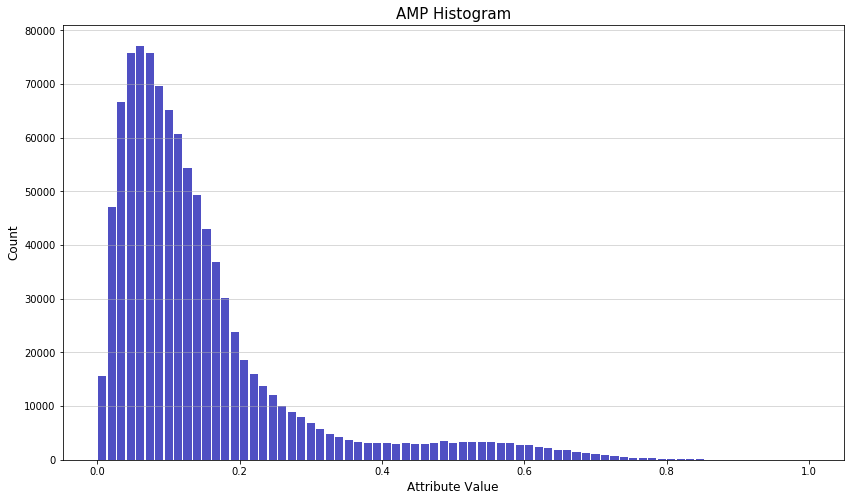

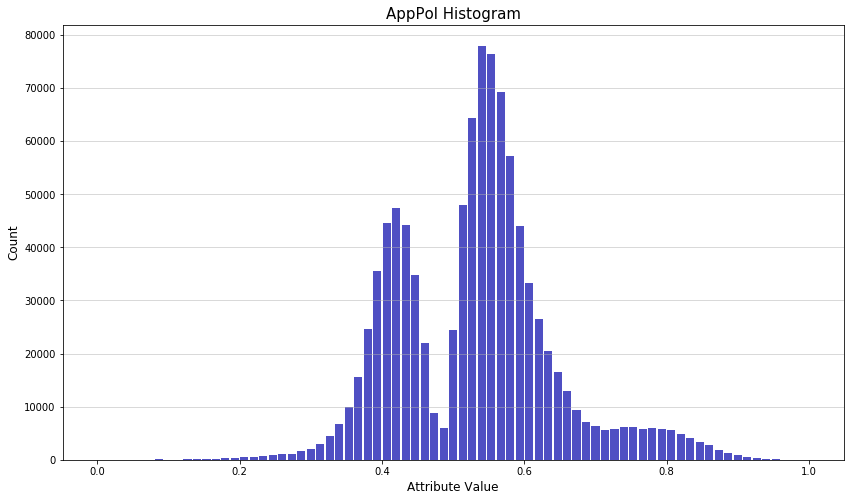

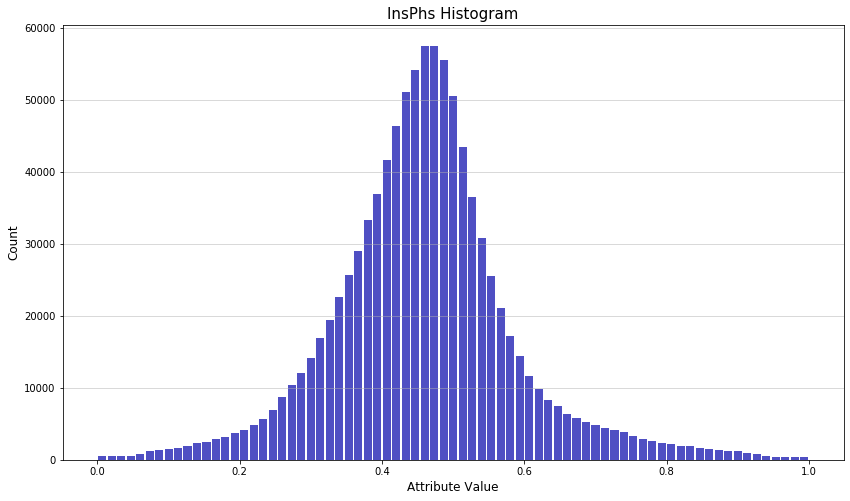

In [53]:
scaler = MinMaxScaler()

final_df_isoF = scaler.fit_transform(final_df)
final_df_isoF = pd.DataFrame(final_df_isoF, columns = final_df.columns)

os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist_isoForest')

for col in final_df_isoF.columns:
    col_hist(final_df_isoF[col], col)

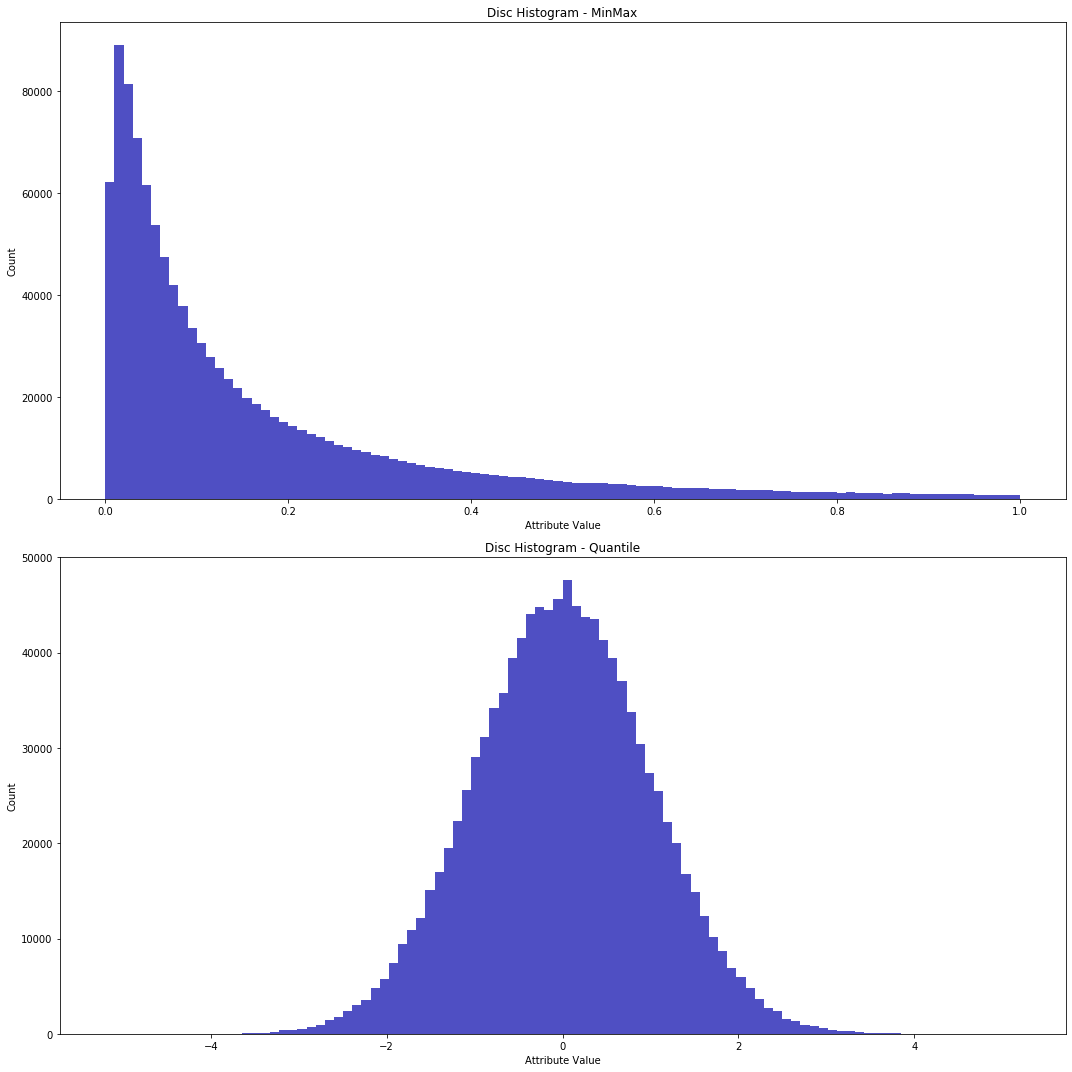

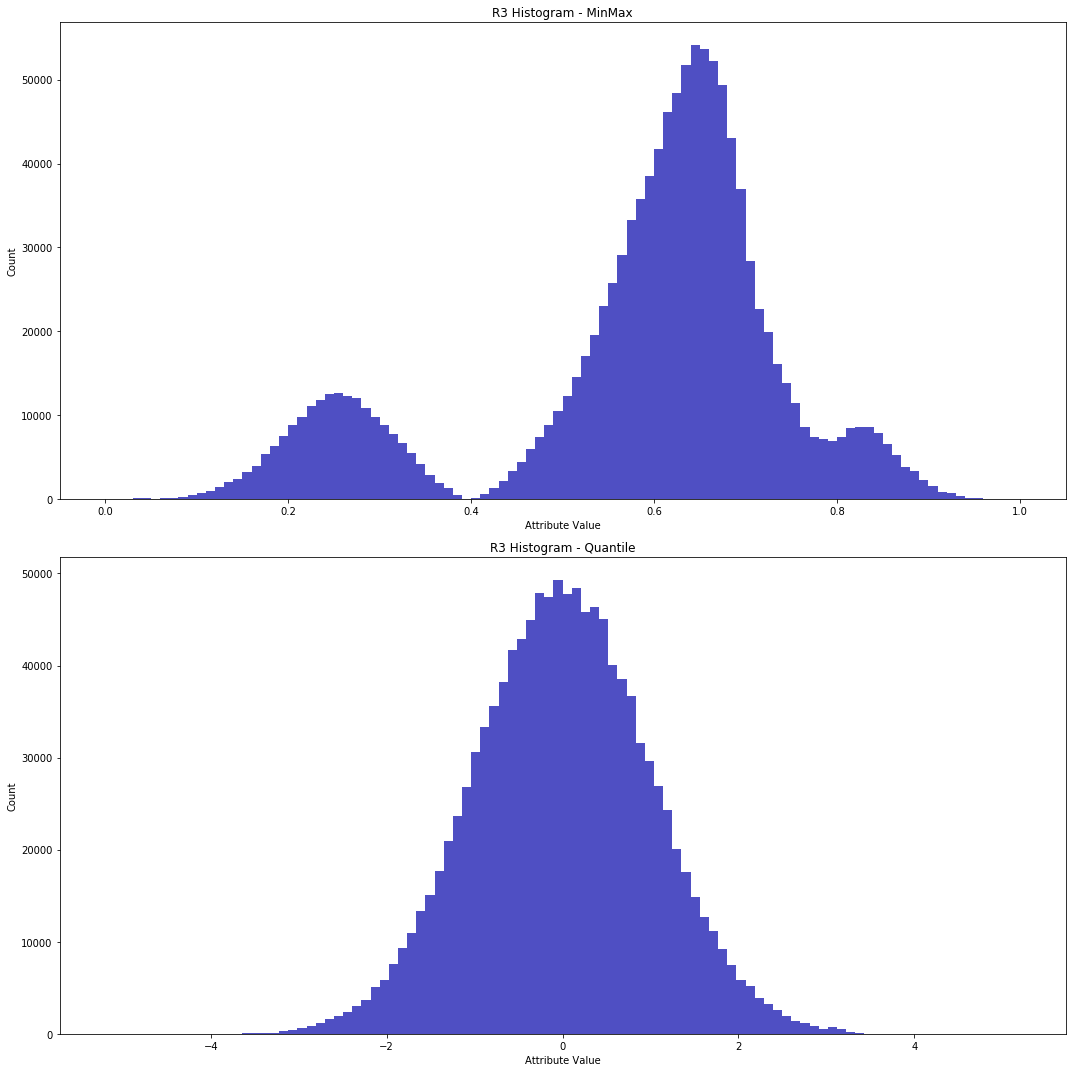

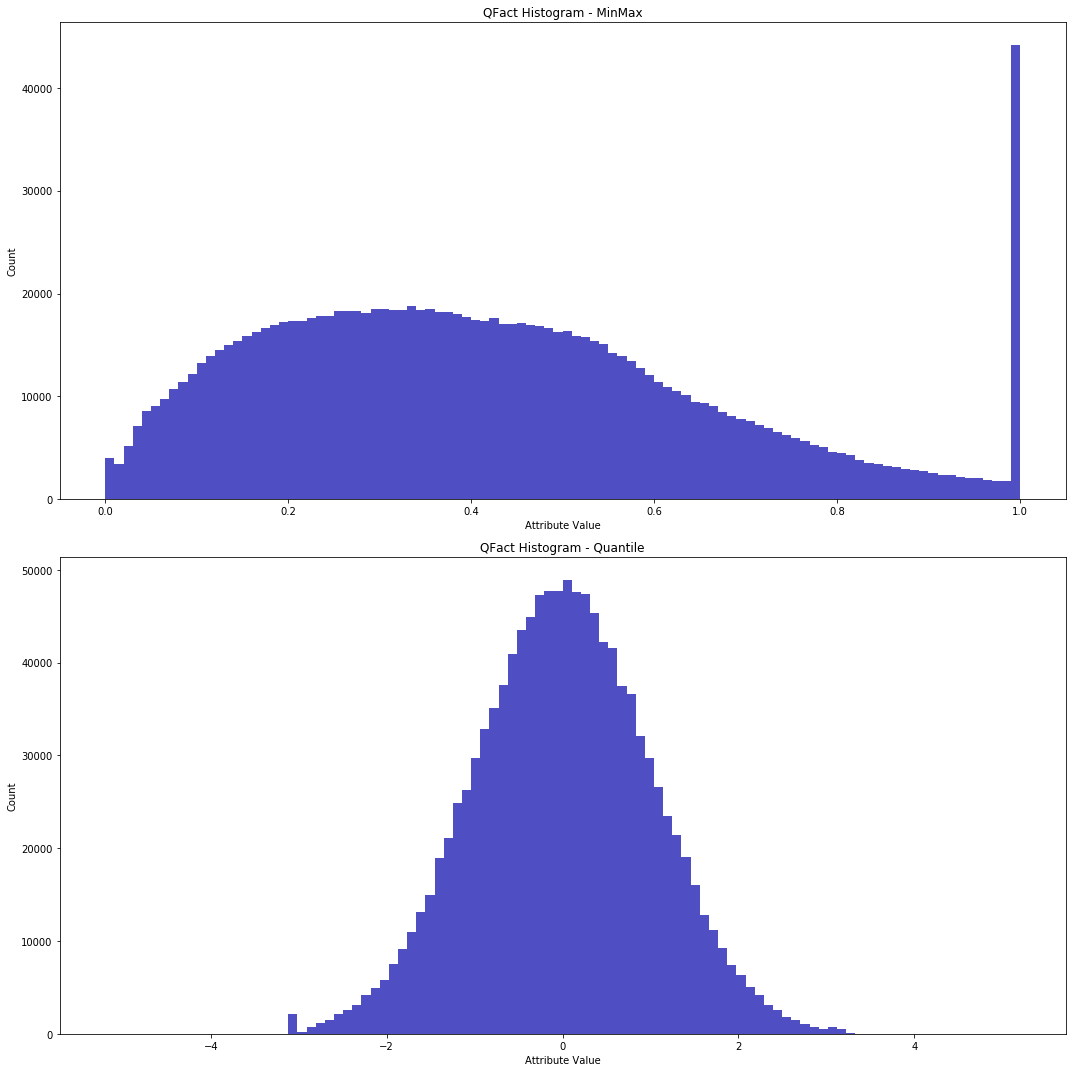

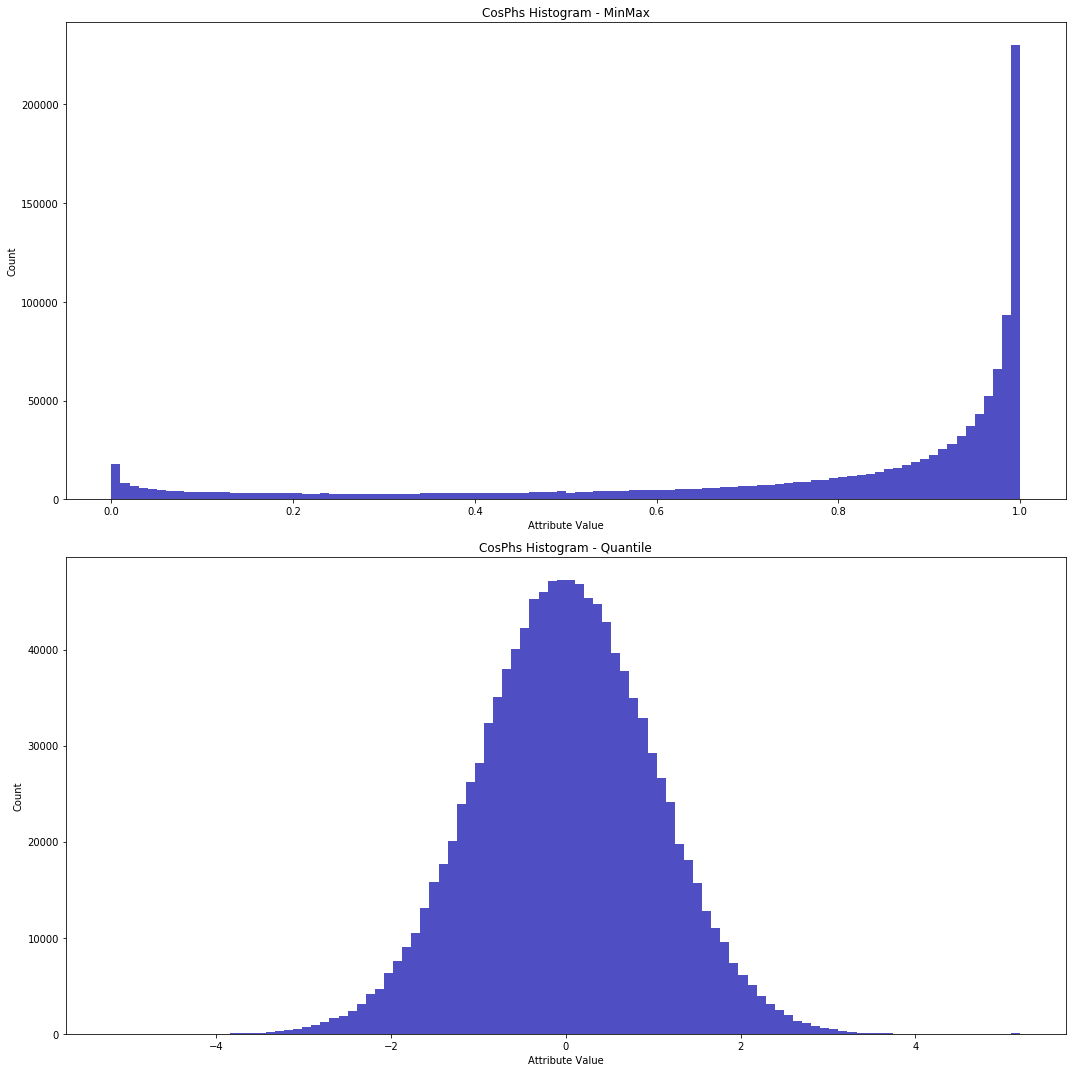

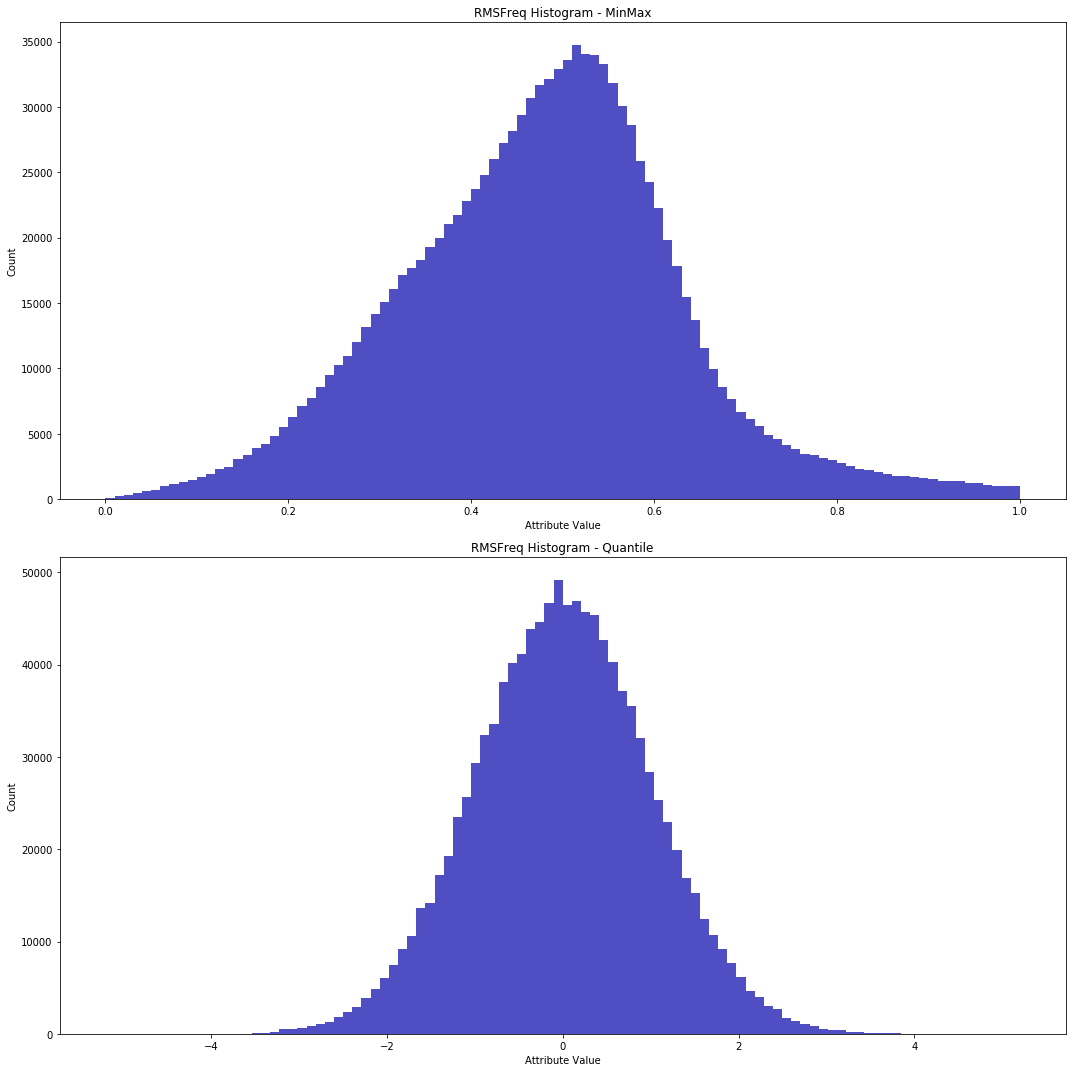

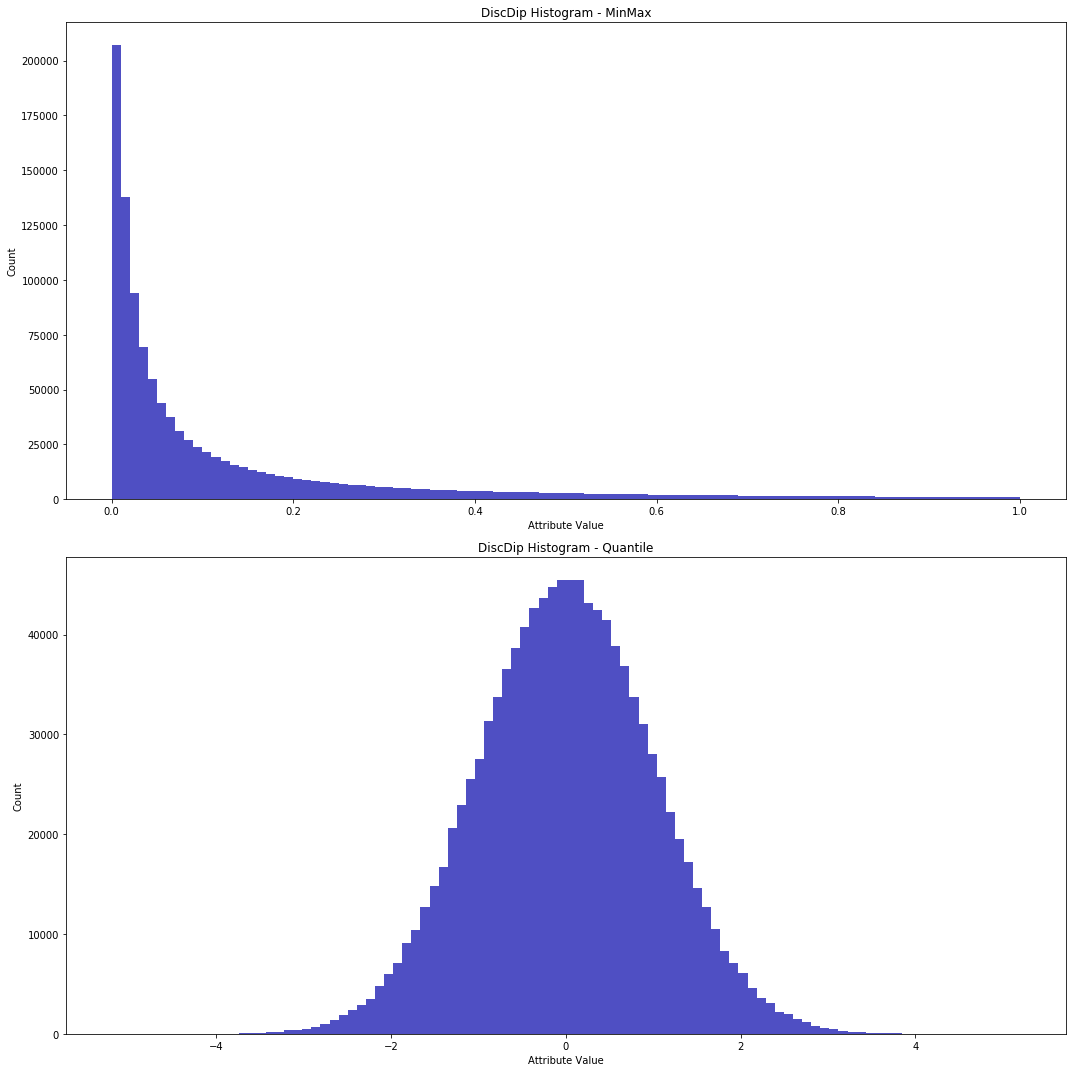

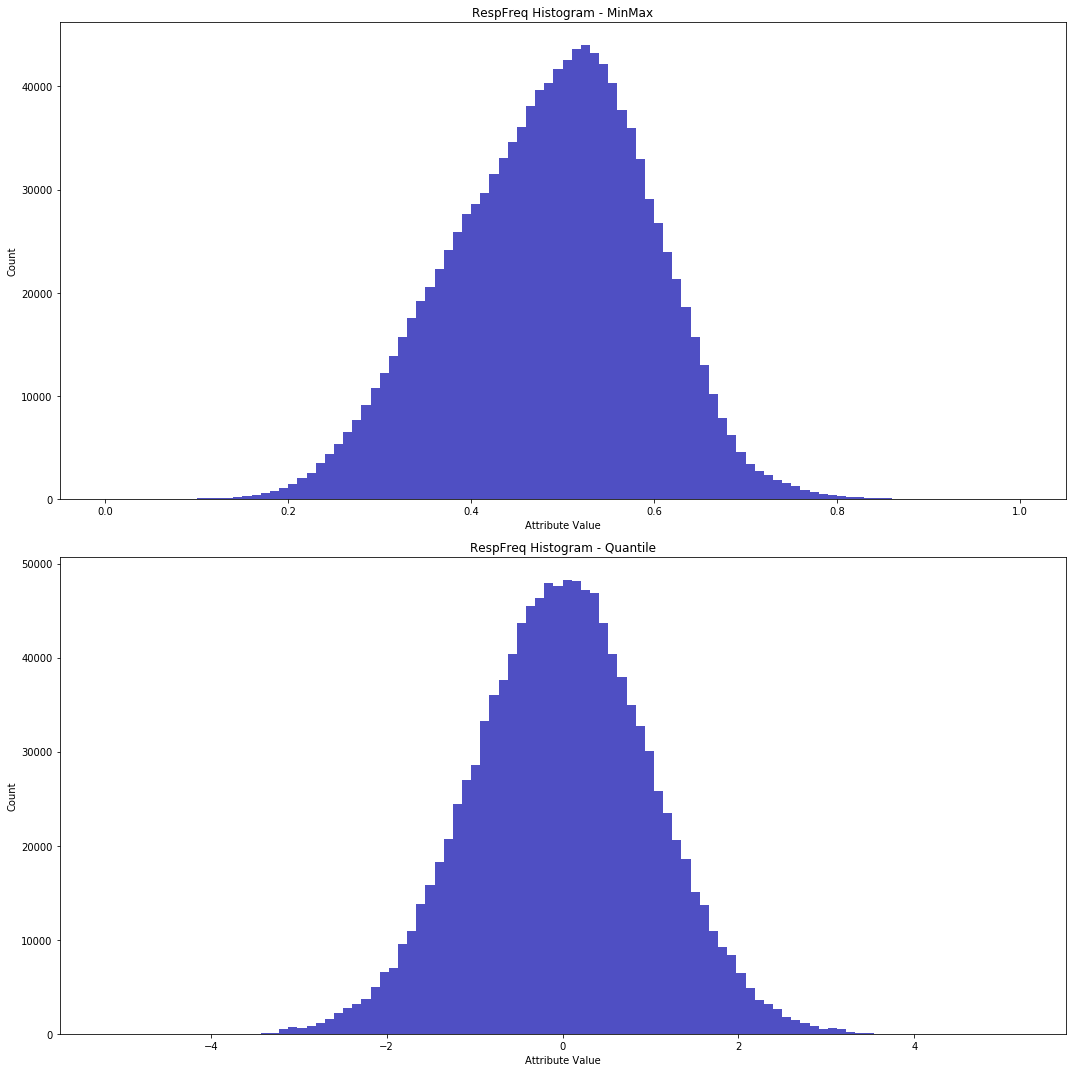

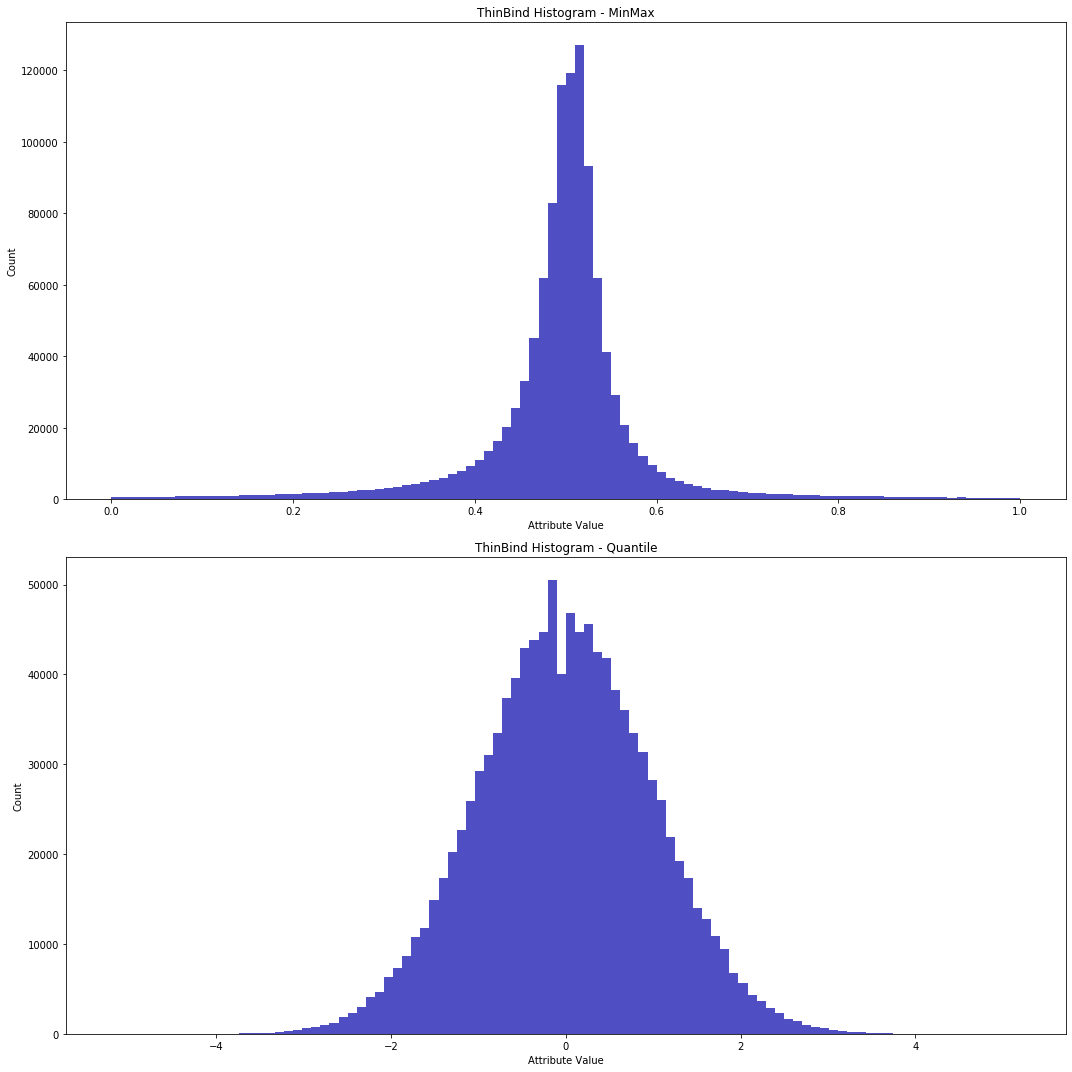

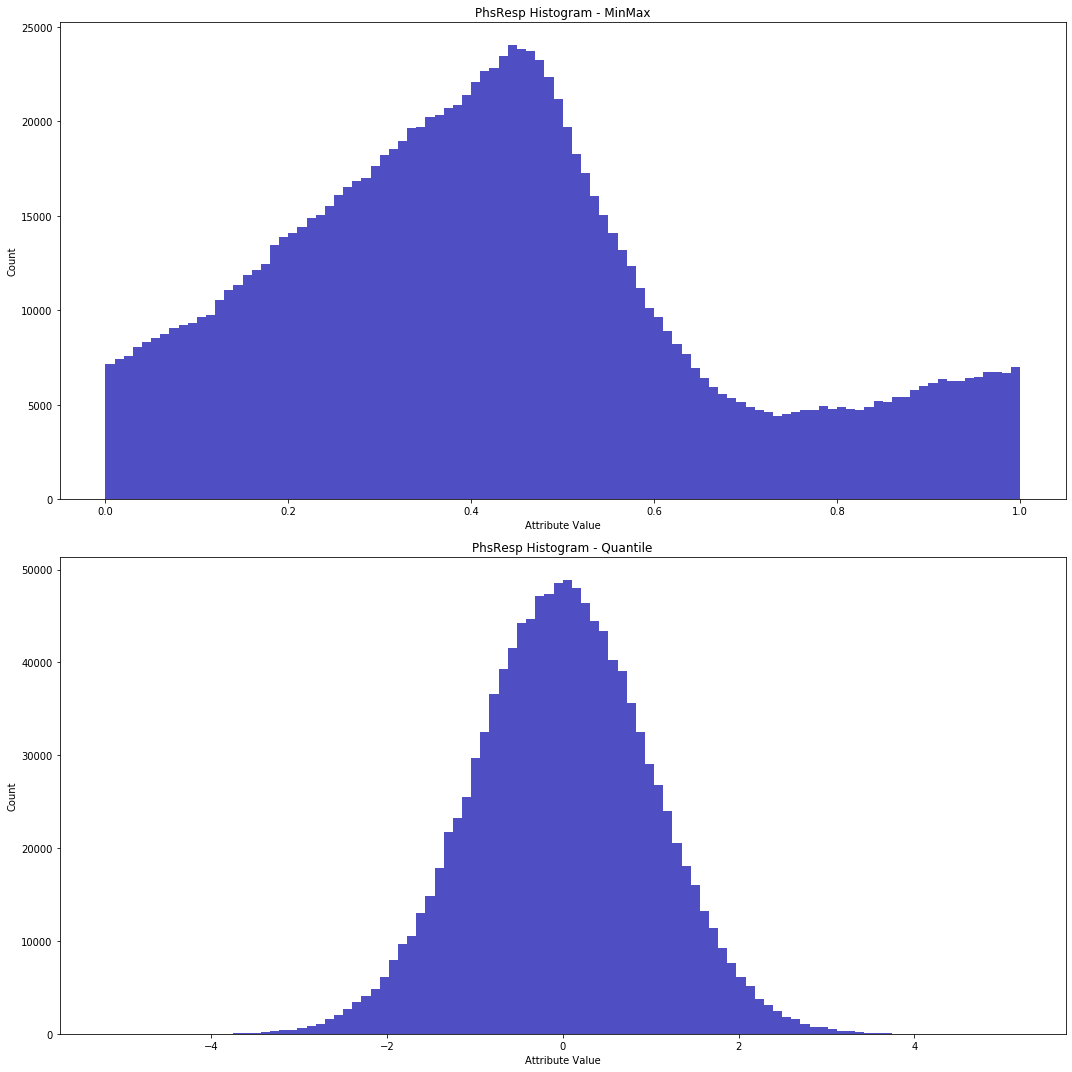

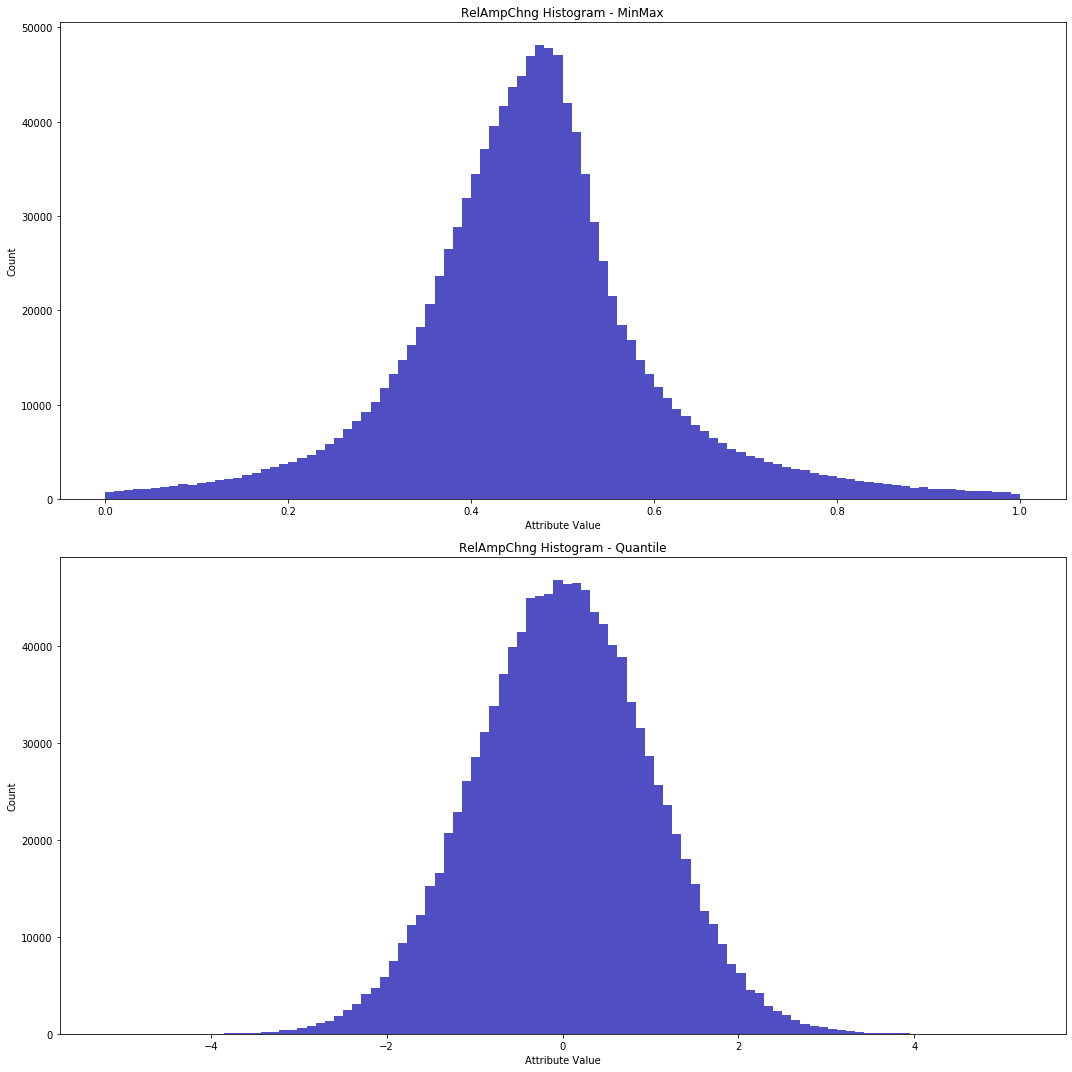

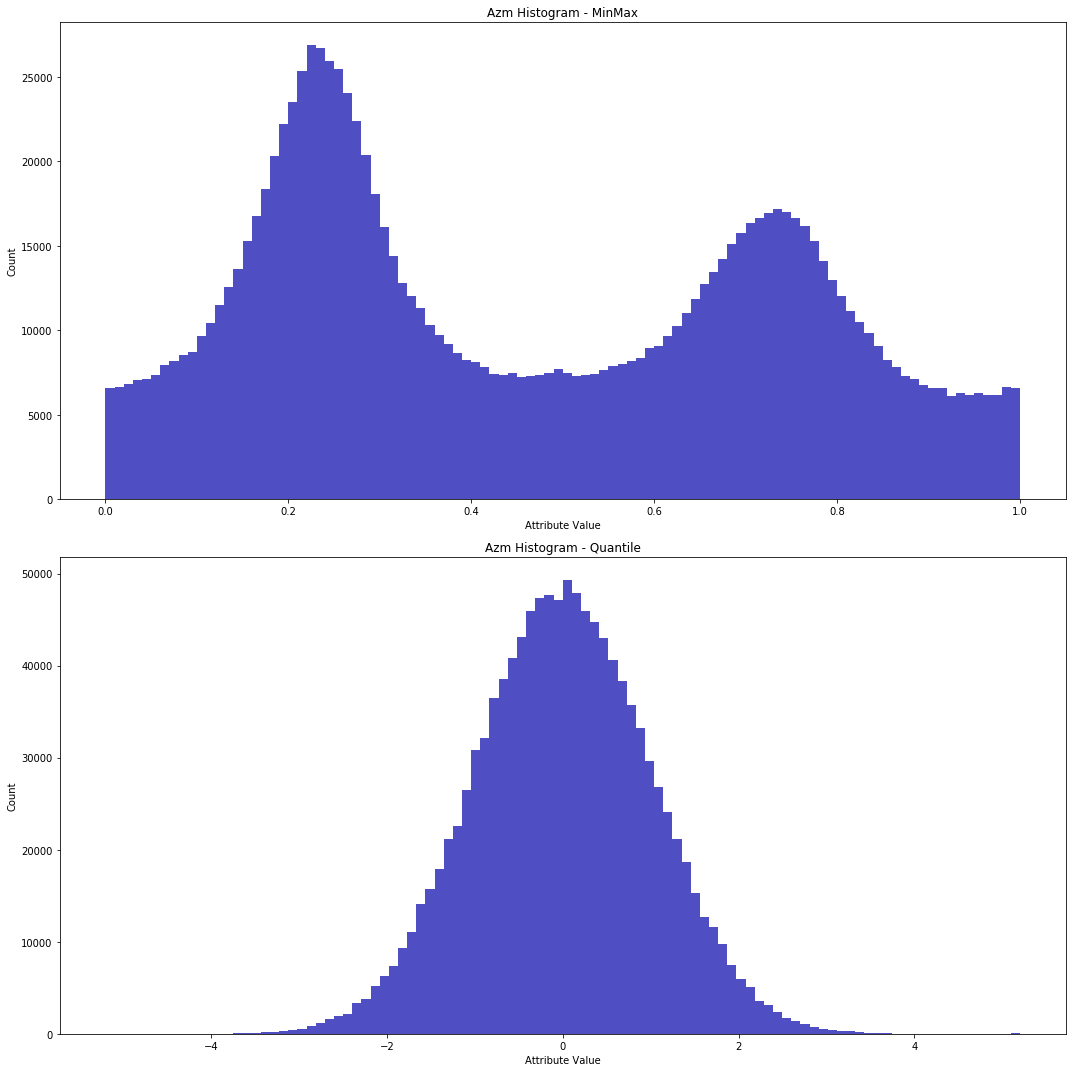

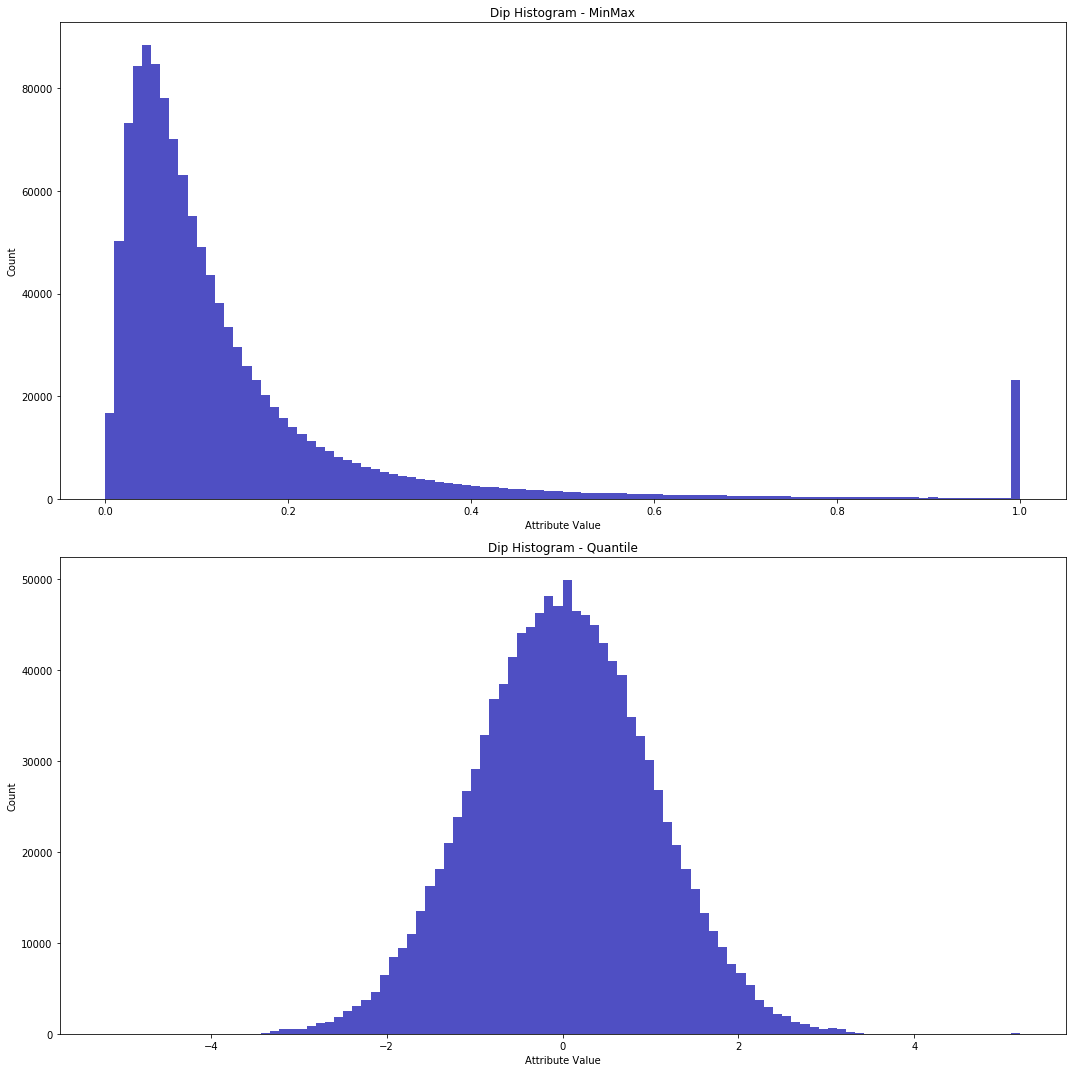

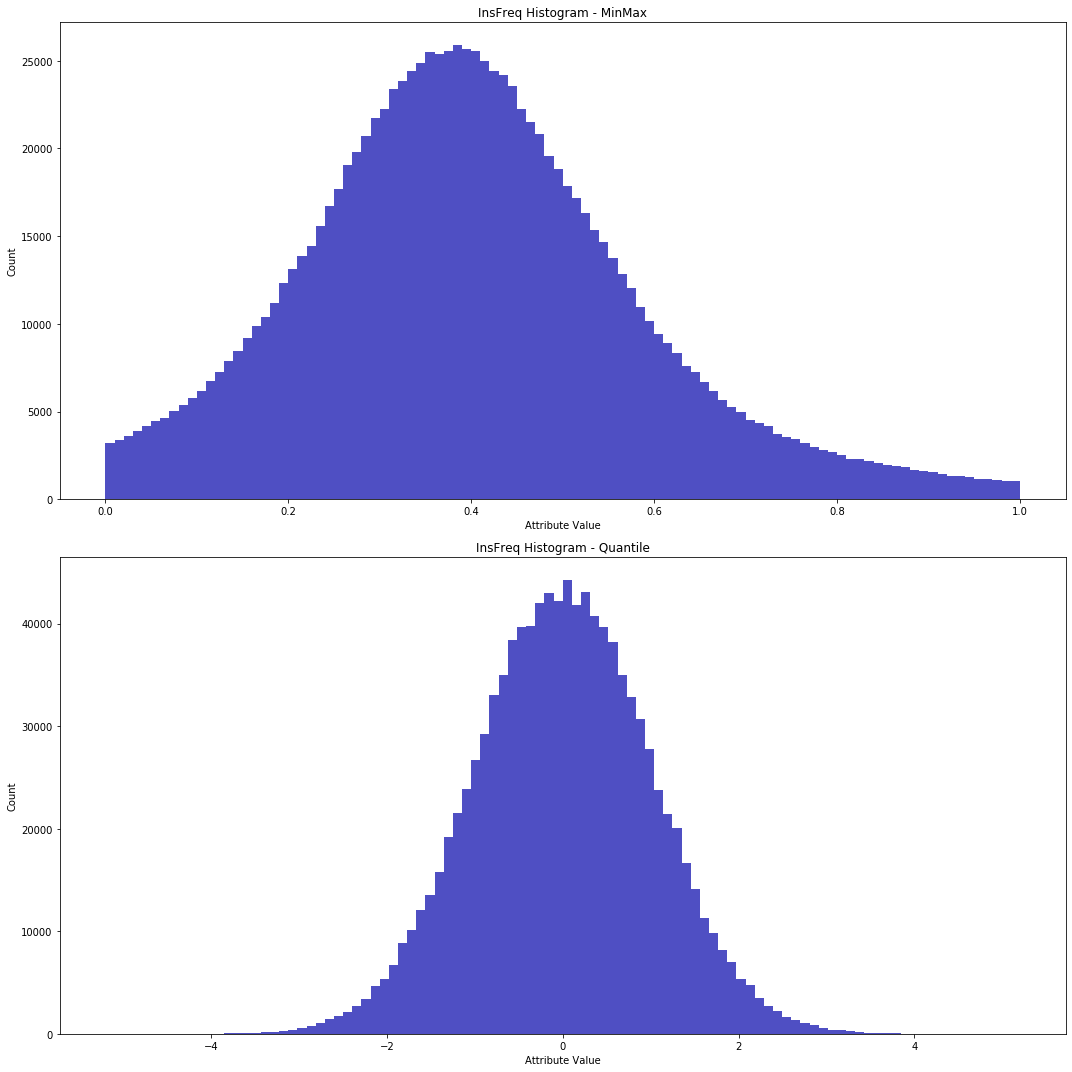

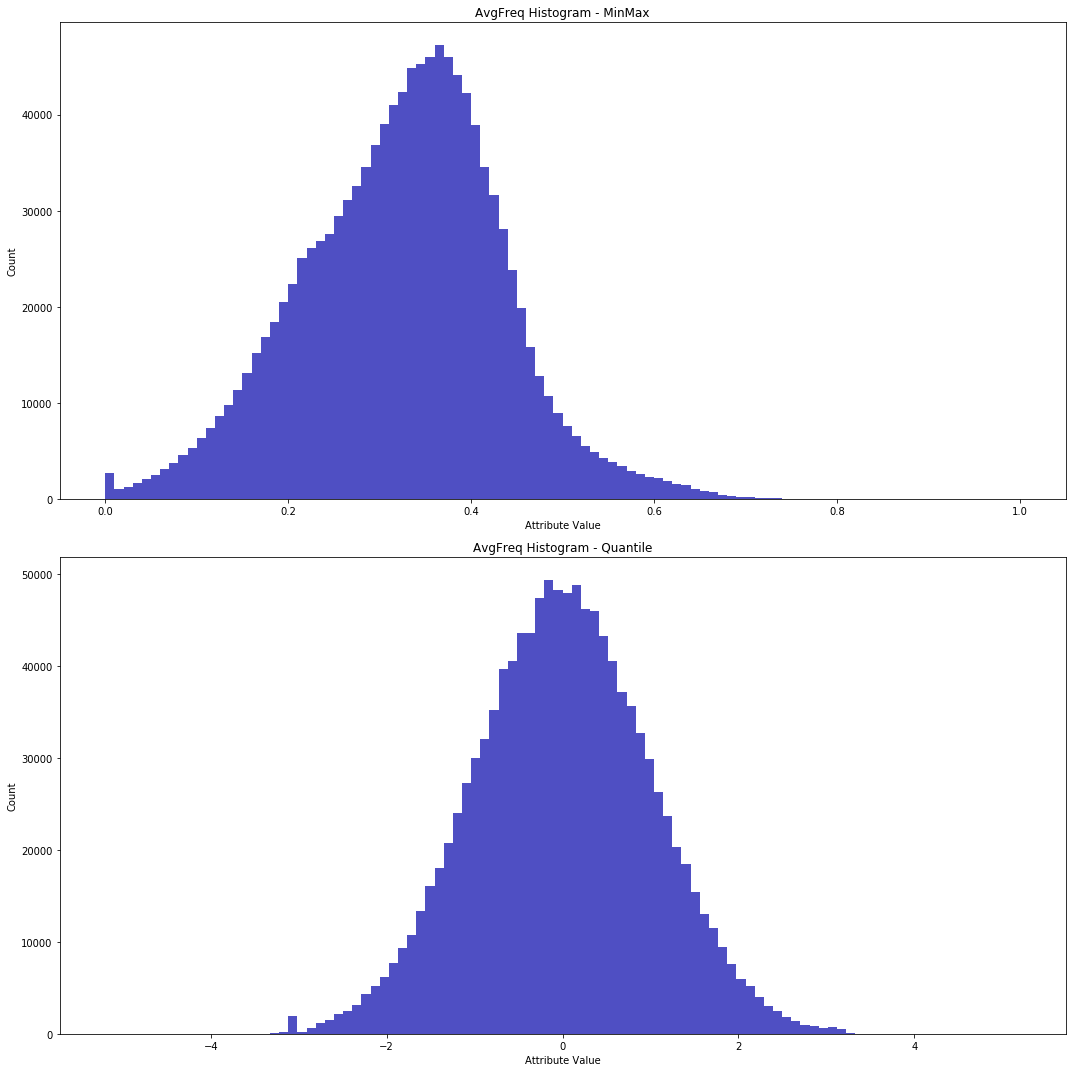

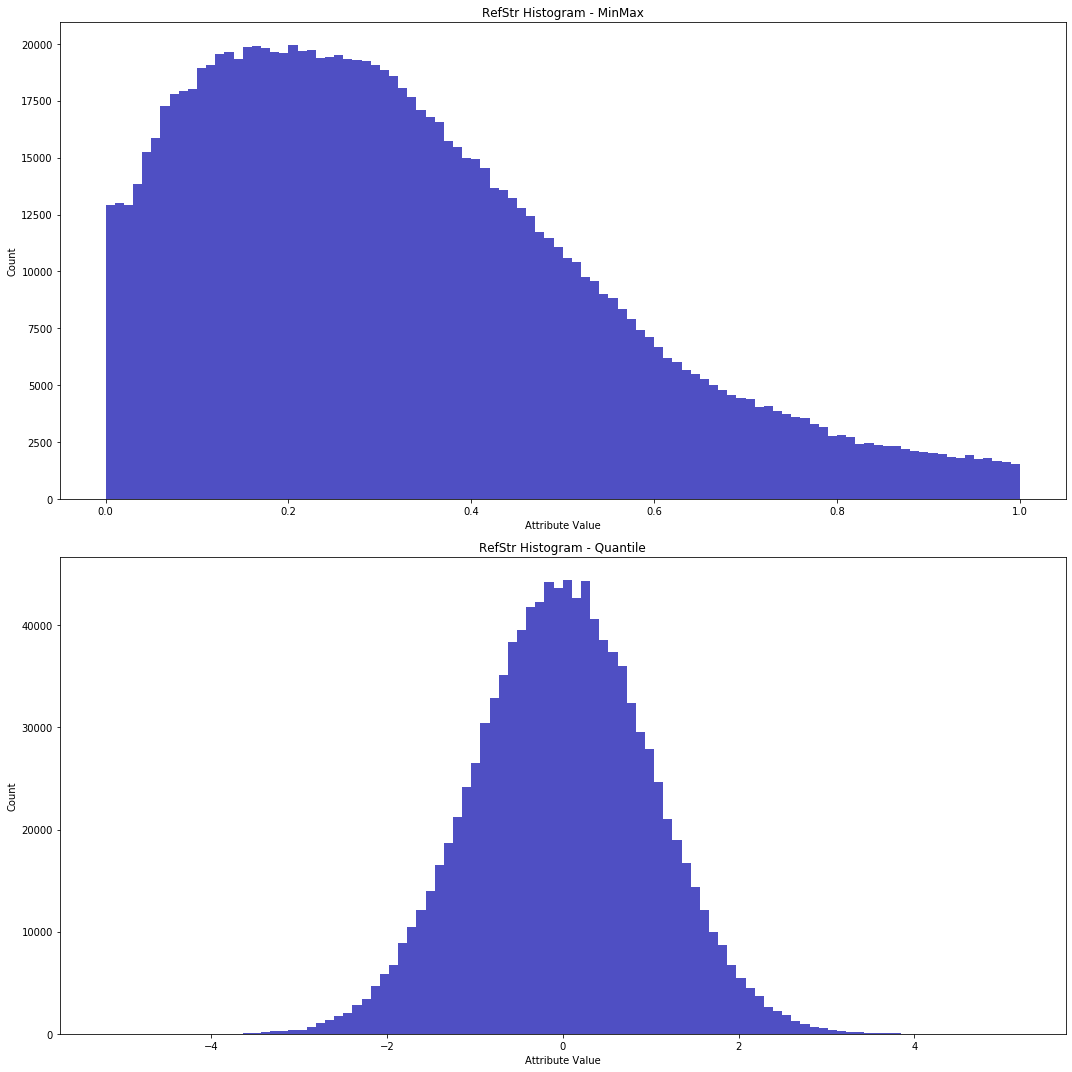

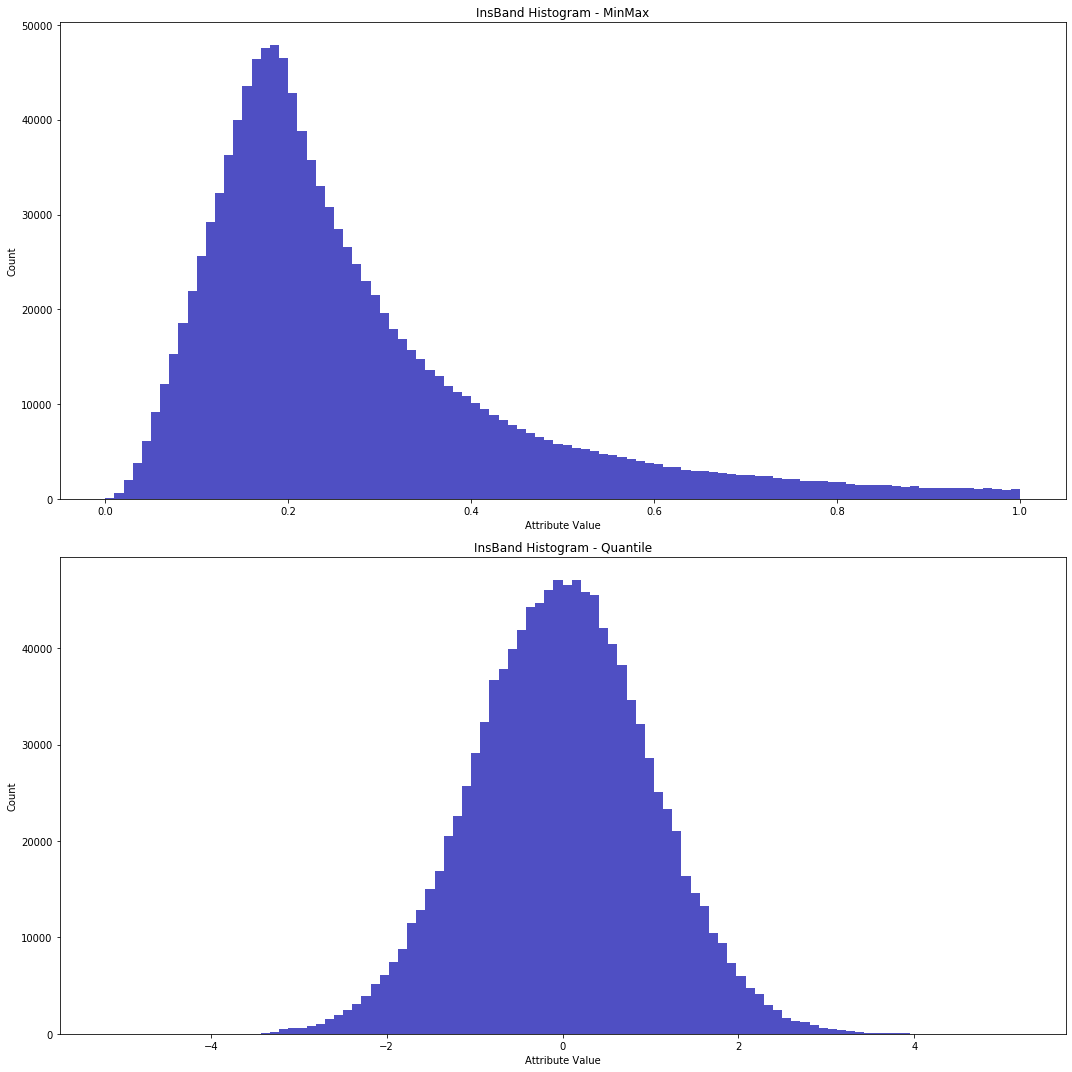

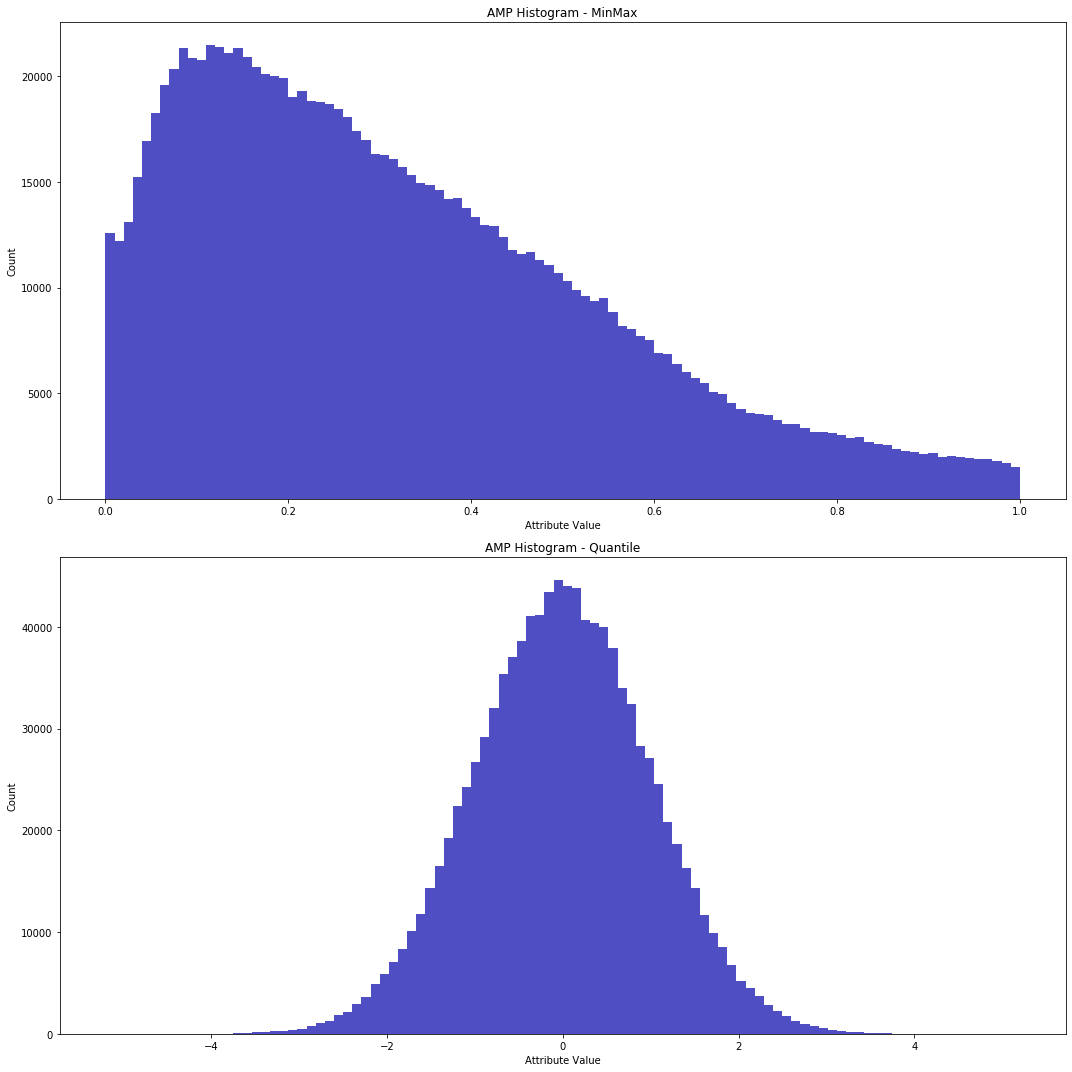

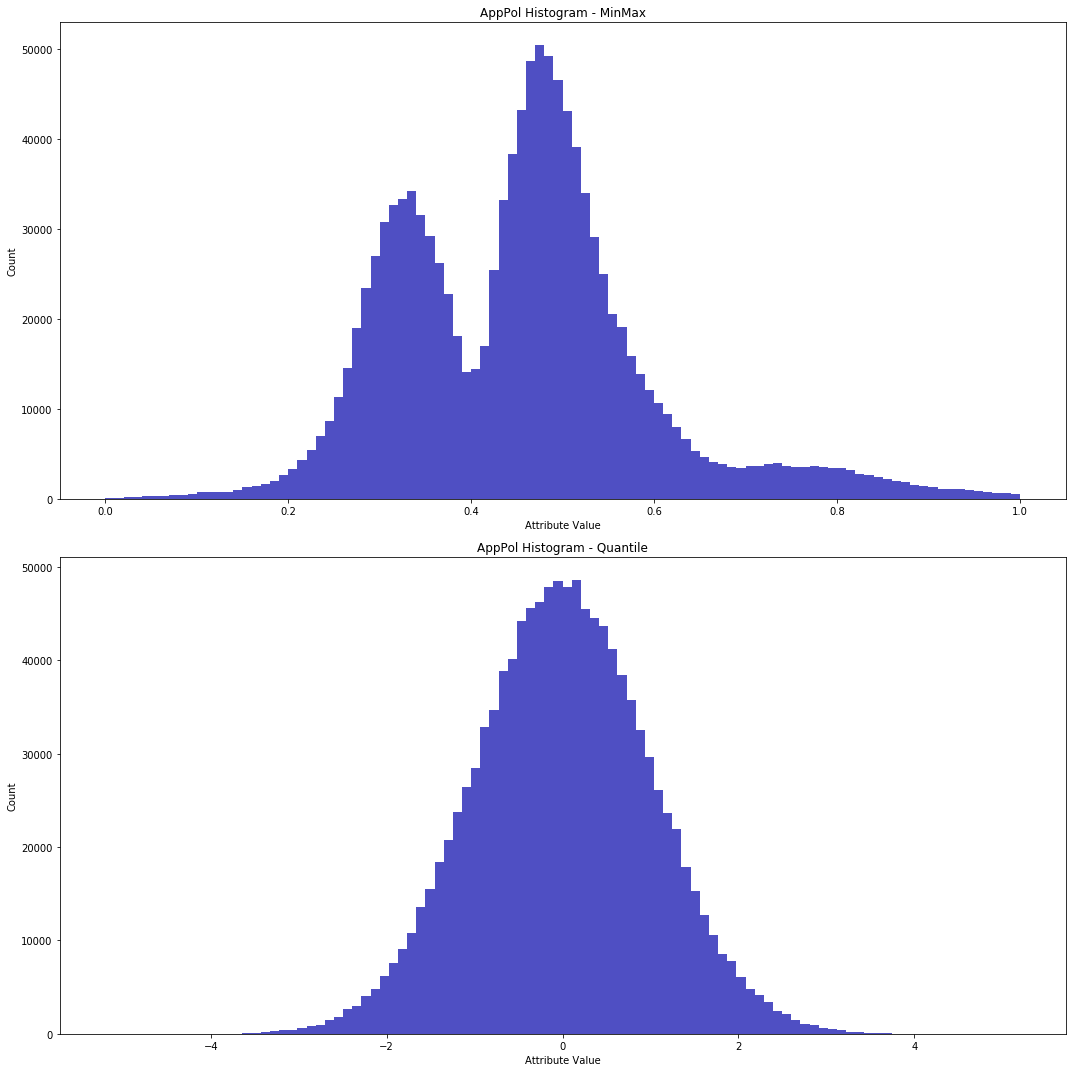

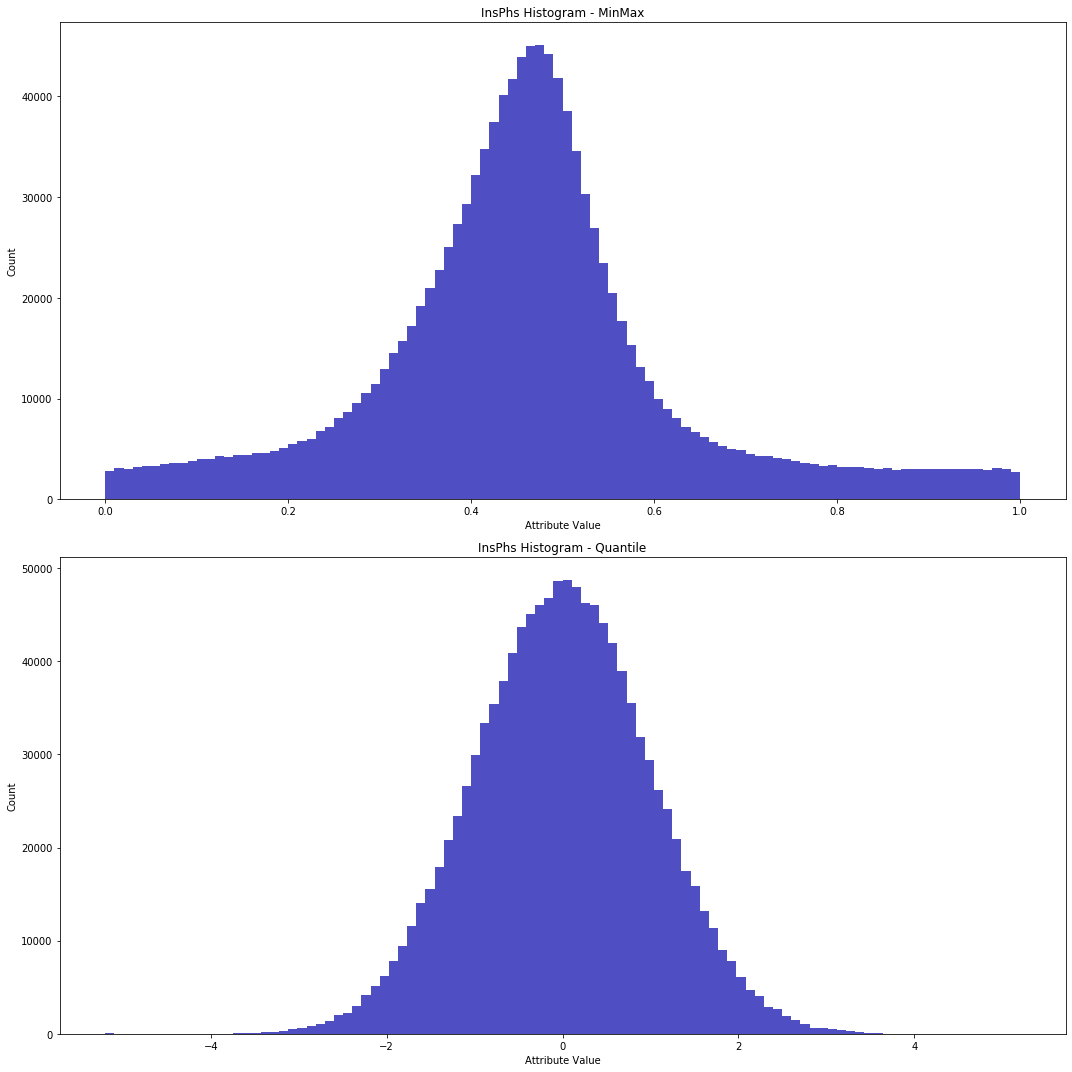

In [111]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/hist_compNorm')

for col in final_df_minmax.columns:
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    n, bins, patches = ax1.hist(x=final_df_minmax[col], bins=100, color='#0504aa',alpha=0.7)
    #ax1.grid(axis='y', alpha=0.60)
    ax1.set_xlabel('Attribute Value')
    ax1.set_ylabel('Count')
    ax1.set_title(str(col) + ' Histogram - MinMax')

    n, bins, patches = ax2.hist(x=final_df_q[col], bins=100, color='#0504aa',alpha=0.7)
    #ax2.grid(axis='y', alpha=0.60)
    ax2.set_xlabel('Attribute Value')
    ax2.set_ylabel('Count')
    ax2.set_title(str(col) + ' Histogram - Quantile')
    
    fig.tight_layout()
    f_name = str(col) +' _CompHist.png'
    plt.savefig(f_name)

In [117]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2/corrMatrix')

In [68]:
corr_matrix = final_df_q.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

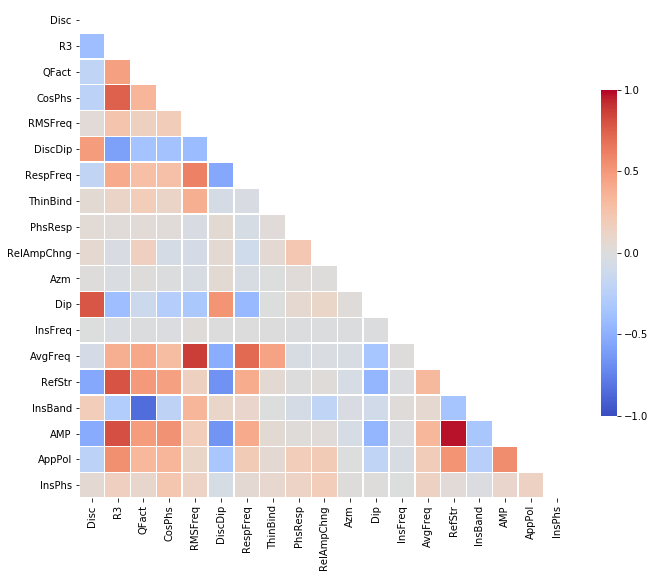

In [72]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1)

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

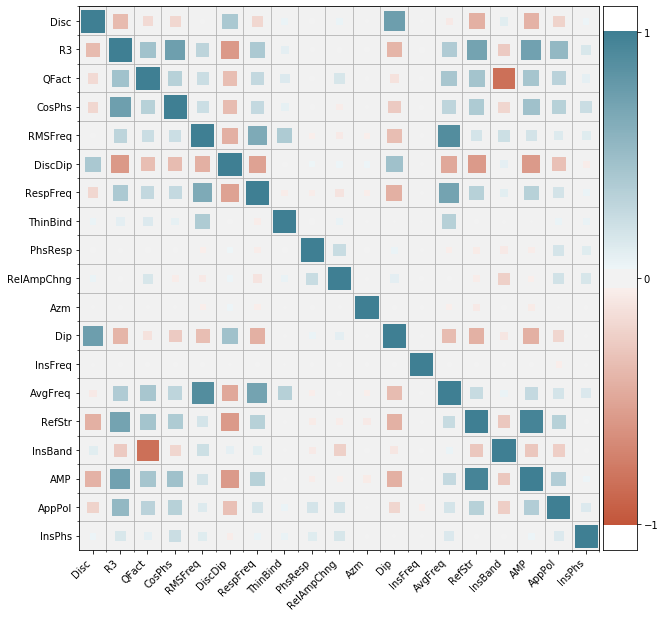

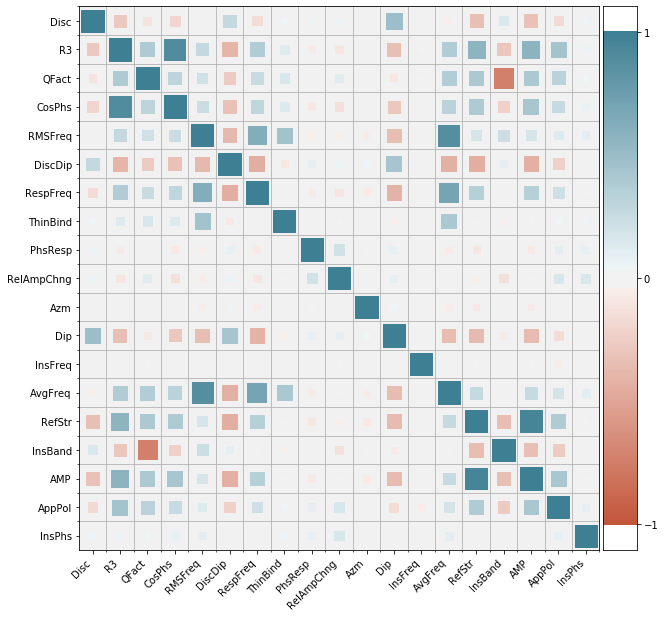

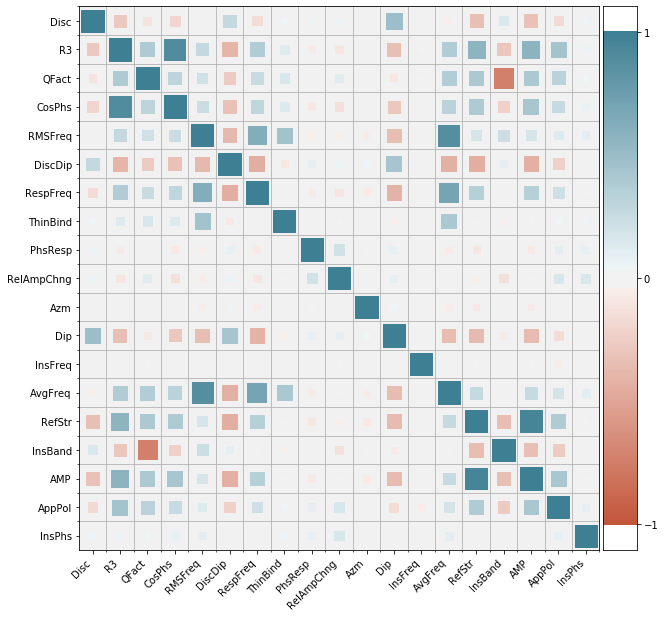

In [120]:
for ntype in a.keys(): 
    plt.figure(figsize=(10, 10))
    plt.title('Corr Matrix with '+ ntype)
    corrMat = a[ntype].corr()
    corrMat.to_csv(ntype+'_corr.csv')
    corrplot(corrMat)
    plt.savefig(ntype+'_corr.png')

In [82]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [88]:
nonNa_df = final_df.dropna()

In [91]:
nonNa_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 791888 entries, ('1000.0000000', '2450.0000000') to ('999.0000000', '7610.0000000')
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disc        791888 non-null  float64
 1   R3          791888 non-null  float64
 2   QFact       791888 non-null  float64
 3   CosPhs      791888 non-null  float64
 4   RMSFreq     791888 non-null  float64
 5   DiscDip     791888 non-null  float64
 6   RespFreq    791888 non-null  float64
 7   ThinBind    791888 non-null  float64
 8   PhsResp     791888 non-null  float64
 9   RelAmpChng  791888 non-null  float64
 10  Azm         791888 non-null  float64
 11  Dip         791888 non-null  float64
 12  InsFreq     791888 non-null  float64
 13  AvgFreq     791888 non-null  float64
 14  RefStr      791888 non-null  float64
 15  InsBand     791888 non-null  float64
 16  AMP         791888 non-null  float64
 17  AppPol      791888 non-null  f

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1167513 entries, ('1000.0000000', '2450.0000000') to ('999.0000000', '7634.0000000')
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Disc        1108371 non-null  float64
 1   R3          1167394 non-null  float64
 2   QFact       1167508 non-null  float64
 3   CosPhs      1148120 non-null  float64
 4   RMSFreq     1135469 non-null  float64
 5   DiscDip     1102902 non-null  float64
 6   RespFreq    1167383 non-null  float64
 7   ThinBind    1112607 non-null  float64
 8   PhsResp     1167270 non-null  float64
 9   RelAmpChng  1133729 non-null  float64
 10  Azm         1167251 non-null  float64
 11  Dip         1167508 non-null  float64
 12  InsFreq     1057716 non-null  float64
 13  AvgFreq     1167508 non-null  float64
 14  RefStr      1065493 non-null  float64
 15  InsBand     1139111 non-null  float64
 16  AMP         1055029 non-null  float64
 17  AppPol    

In [ ]:
os.chdir('/home/data_science/git_projects/shashwat/sfml/phase2')
final_df_minmax.to_parquet('smallVol_df.parquet.gzip',compression='gzip')